In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
# suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [2]:
# source("https://bioconductor.org/biocLite.R")
# biocLite("Gviz")

In [3]:
### full results from eQTL runs at all stages (for Manhattan plots)

In [4]:
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [8]:
res = res.ips
i = which(res.ips$feature == "ENSG00000179750_APOBEC3B" &
         res.ips$snp_id == "22_39358037_A_C")
gene = res$feature[i]
snp = res$snp_id[i]
gene
snp

[1] "ENSG00000179750_APOBEC3B"

[1] "22_39358037_A_C"

In [ ]:
res[i,]

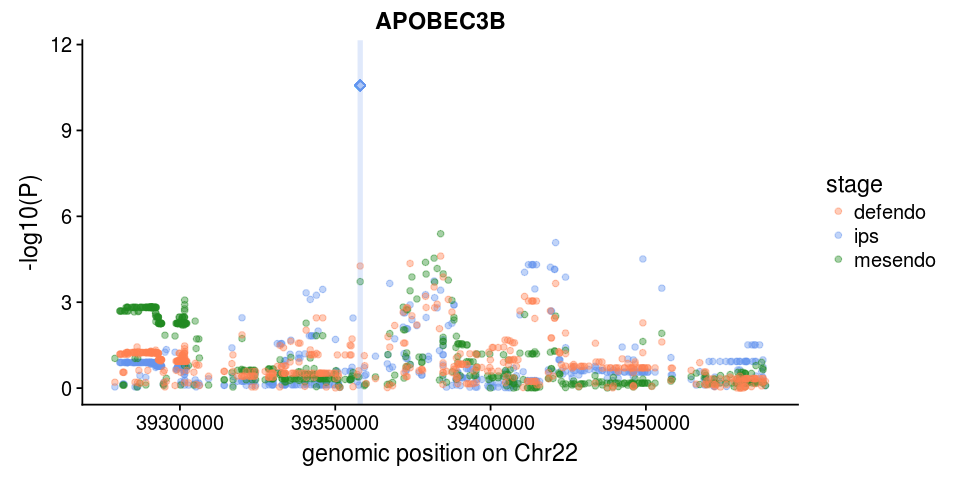

In [17]:
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$pos[i], col = "cornflowerblue", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$pos[i], y = -log10(m)), col = "cornflowerblue", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
p = p + ggtitle(gsub(".*_","",gene)) 
p

In [5]:
head(res.ips)

beta      beta_se   empirical_feature_p_value p_value   snp_id         
1 0.1034053 0.1156505 1                         0.3712581 1_100712195_G_C
2 0.1034053 0.1156505 1                         0.3712581 1_100713300_G_T
3 0.1034053 0.1156505 1                         0.3712581 1_100713580_A_C
4 0.1034053 0.1156505 1                         0.3712581 1_100713707_C_A
5 0.1034053 0.1156505 1                         0.3712581 1_100713760_A_G
6 0.1034053 0.1156505 1                         0.3712581 1_100713783_G_T
  feature                permutation_0 permutation_1 permutation_2
1 ENSG00000079335_CDC14A 0.4119083     0.02609394    0.6008147    
2 ENSG00000079335_CDC14A 0.4119083     0.02609394    0.6008147    
3 ENSG00000079335_CDC14A 0.4119083     0.02609394    0.6008147    
4 ENSG00000079335_CDC14A 0.4119083     0.02609394    0.6008147    
5 ENSG00000079335_CDC14A 0.4119083     0.02609394    0.6008147    
6 ENSG00000079335_CDC14A 0.4119083     0.02609394    0.6008147    
  permutation_3 ⋯ permutation_5 permutation_6 permutation_7 permutation_8
1 0.1373799     ⋯ 0.729434      0.1993281     0.2655322     0.9174491    
2 0.1373799     ⋯ 0.729434      0.1993281     0.2655322     0.9174491    
3 0.1373799     ⋯ 0.729434      0.1993281     0.2655322     0.9174491    
4 0.1373799     ⋯ 0.729434      0.1993281     0.2655322     0.9174491    
5 0.1373799     ⋯ 0.729434      0.1993281     0.2655322     0.9174491    
6 0.1373799     ⋯ 0.729434      0.1993281     0.2655322     0.9174491    
  permutation_9 ensembl_gene_id chrom pos       ref_allele alt_allele
1 0.8586736     ENSG00000079335 1     100712195 G          C         
2 0.8586736     ENSG00000079335 1     100713300 G          T         
3 0.8586736     ENSG00000079335 1     100713580 A          C         
4 0.8586736     ENSG00000079335 1     100713707 C          A         
5 0.8586736     ENSG00000079335 1     100713760 A          G         
6 0.8586736     ENSG00000079335 1     100713783 G          T

In [ ]:
## annotation files for leads (top snp per gene)
## info on whether the snp is or is in LD with a snp that is
## a GWAS hit
## found in GTEx (all tissues)

In [14]:
anno_allres_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.txt"
anno_allres = read.csv(anno_allres_filename, sep = "\t")

In [16]:
tail(anno_allres)

feature                  snp_id          stage   beta.mean  beta_se   
4819 ENSG00000176974_SHMT1    17_18241345_T_C defendo -0.3378109 0.08870981
4820 ENSG00000141295_SCRN2    17_45929169_C_T defendo -0.2622096 0.08305365
4821 ENSG00000144366_GULP1    2_189477117_T_G defendo -0.2955982 0.07930153
4822 ENSG00000035141_FAM136A  2_70426325_C_T  defendo -0.3292546 0.08106452
4823 ENSG00000220749_RPL21P28 1_212274717_G_A defendo -0.7356614 0.20325899
4824 ENSG00000136933_RABEPK   9_127989393_A_G defendo -0.2380972 0.07634117
     empirical_feature_p_value p_value.mean global_corr_p_value snp_chromosome
4819 0.01391104                1.400702e-04 0.09681072          17            
4820 0.01392259                1.593403e-03 0.09681072          17            
4821 0.01402459                1.933712e-04 0.09720169           2            
4822 0.01410277                4.872993e-05 0.09754000           2            
4823 0.01442765                2.953668e-04 0.09940785           1            
4824 0.01456665                1.815538e-03 0.09991011           9            
     snp_position ⋯ Brain_Putamen_basal_ganglia_LD
4819  18241345    ⋯ -                             
4820  45929169    ⋯ -                             
4821 189477117    ⋯ -                             
4822  70426325    ⋯ -                             
4823 212274717    ⋯ -                             
4824 127989393    ⋯ -                             
     Brain_Cerebellar_Hemisphere_Variant Brain_Cerebellar_Hemisphere_Annotation
4819 -                                   -                                     
4820 {17_45912302_C_T}                   {17_45912302_C_T_b37-ENSG00000141294} 
4821 -                                   -                                     
4822 -                                   -                                     
4823 -                                   -                                     
4824 -                                   -                                     
     Brain_Cerebellar_Hemisphere_LD Artery_Tibial_Variant
4819 -                              -                    
4820 {0.9720930232558145}           {17_45912302_C_T}    
4821 -                              -                    
4822 -                              {2_70518785_G_A}     
4823 -                              -                    
4824 -                              -                    
     Artery_Tibial_Annotation              Artery_Tibial_LD    
4819 -                                     -                   
4820 {17_45912302_C_T_b37-ENSG00000141295} {0.9720930232558145}
4821 -                                     -                   
4822 {2_70518785_G_A_b37-ENSG00000116005}  {0.9273984442523769}
4823 -                                     -                   
4824 -                                     -                   
     Lung_Variant                       
4819 {17_18241354_G_C};{17_18241345_T_C}
4820 {17_45915395_T_C}                  
4821 -                                  
4822 -                                  
4823 -                                  
4824 -                                  
     Lung_Annotation                                                            
4819 {17_18241354_G_C_b37-ENSG00000176994};{17_18241345_T_C_b37-ENSG00000267350}
4820 {17_45915395_T_C_b37-ENSG00000141295}                                      
4821 -                                                                          
4822 -                                                                          
4823 -                                                                          
4824 -                                                                          
     Lung_LD                                  
4819 {0.9999999999999997};{0.9999999999999997}
4820 {0.8043639981938413}                     
4821 -                                        
4822 -                                        
4823 -                                        
4824 -

In [17]:
anno_allres$eqtl = paste0(anno_allres$feature,"-",anno_allres$snp_id)
nrow(anno_allres)
length(unique(anno_allres$eqtl))

[1] 4824

[1] 4470

In [13]:
anno_allres1000g_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.GWAS.tagging.1000g_ref.txt"
anno_allres1000g = read.csv(anno_allres_filename, sep = "\t")

In [14]:
anno_allres1000g$how_many_gtex_tissues = 0
for (i in 1:nrow(anno_allres1000g)){
    anno_allres1000g$how_many_gtex_tissues[i] = sum(gsub("-","0",gsub("\\}","",gsub("\\{","",anno_allres1000g[i,grep("LD",colnames(anno_allres1000g))])))>0)
}

In [15]:
anno_allres1000g_gwas <- anno_allres1000g[anno_allres1000g$GWAS_LD != "-" & anno_allres1000g$how_many_gtex_tissues == 1,]

In [16]:
head(anno_allres1000g_gwas)

In [17]:
hist(as.numeric(anno_allres1000g$how_many_gtex_tissues), breaks = 50)

In [19]:
res = anno_allres1000g_gwas
# i = which(res$feature =="ENSG00000152359_POC5")
for (i in 1:nrow(res)){
    if (i == 8 | i == 10 | i == 27 | i == 32 | i == 37){ next }
    gene = res$feature[i]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
    df2 = res.defendo[res.defendo$feature == gene,]
    df2$stage = "defendo"
    df = rbind(df0,df1,df2)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
    p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+1)) 
    p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
    p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "grey", pch = 23, size = 1)
    options(repr.plot.width = 8, repr.plot.height = 4)
    gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
    p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                       ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
    print(i)
    print(p)
}

In [ ]:
res = anno_allres1000g_gwas
# i = which(res$feature =="ENSG00000152359_POC5")
for (i in 1:nrow(res)){
    if (i != 8 & i != 10 & i != 27 & i != 32 & i != 37 & i != 42){ next }
    gene = res$feature[i]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
    df = rbind(df0,df1)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
    p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+1)) 
    p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
    p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "grey", pch = 23, size = 1)
    options(repr.plot.width = 8, repr.plot.height = 4)
    gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
    p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage,
                       ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
#     print(i)
    print(p)
}

In [ ]:
### count for how many sets we (this includes all GTEx tissues and GWAS) have a hit (at least one LD value)

In [11]:
anno_allres$how_many_gtex_tissues = 0
for (i in 1:nrow(anno_allres)){
    anno_allres$how_many_gtex_tissues[i] = sum(gsub("-","0",gsub("\\}","",gsub("\\{","",anno_allres[i,grep("LD",colnames(anno_allres))])))>0)
}

In [4]:
### the only "tissue" is GWAS

In [12]:
anno_allres_gwas <- anno_allres[anno_allres$GWAS_LD != "-" & anno_allres$how_many_gtex_tissues == 1,]

In [13]:
anno_allres_gwas_noips <- anno_allres_gwas[anno_allres_gwas$stage != "ips",]

In [ ]:
res = anno_allres_gwas_noips
nrow(res)
# i = which(res$feature =="ENSG00000152359_POC5")
for (i in 1:nrow(res)){
    if (i == 5 | i == 22 | i == 27){ next }
    gene = res$feature[i]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
    df2 = res.defendo[res.defendo$feature == gene,]
    df2$stage = "defendo"
    df = rbind(df0,df1,df2)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
    p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+1)) 
    p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
    p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "grey", pch = 23, size = 1)
    options(repr.plot.width = 8, repr.plot.height = 4)
    gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
    gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
    p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
    p = p + ggtitle(gsub(".*_","",gene)) 
    print(p)
    print(res$stage[i])
    print(res[i,"GWAS_Annotation"])
}

In [ ]:
res = anno_allres_gwas_noips
# i = which(res$feature =="ENSG00000152359_POC5")
for (i in 1:nrow(res)){
    if (i != 5 & i != 22 & i != 27){ next }
    gene = res$feature[i]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
#     df2 = res.defendo[res.defendo$feature == gene,]
#     df2$stage = "defendo"
    df = rbind(df0,df1)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
    p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+1))
    p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
    p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "grey", pch = 23, size = 1)
    options(repr.plot.width = 8, repr.plot.height = 4)
    gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
    gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
    p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "firebrick", size = 0.5)
    p = p + ggtitle(gsub(".*_","",gene)) 
    print(p)
    print(res$stage[i])
    print(res[i,"GWAS_Annotation"])

}

In [ ]:
dim(anno_allres_gwas)

In [14]:
gwas_nogtex_noips = anno_allres_gwas[anno_allres_gwas$stage != "ips",c("snp_id","feature","GWAS_LD","GWAS_Variant",
                                                                       "GWAS_Annotation","global_corr_p_value","stage",
                                                                       "snp_position","stage_specific","q_value",
                                                                       "p_value.mean","beta.mean","p_value.int",
                                                                       "beta.int","sign.int")]

In [15]:
gwas_nogtex_noips <- gwas_nogtex_noips[order(gwas_nogtex_noips$global_corr_p_value),]

In [16]:
nrow(gwas_nogtex_noips)

[1] 27

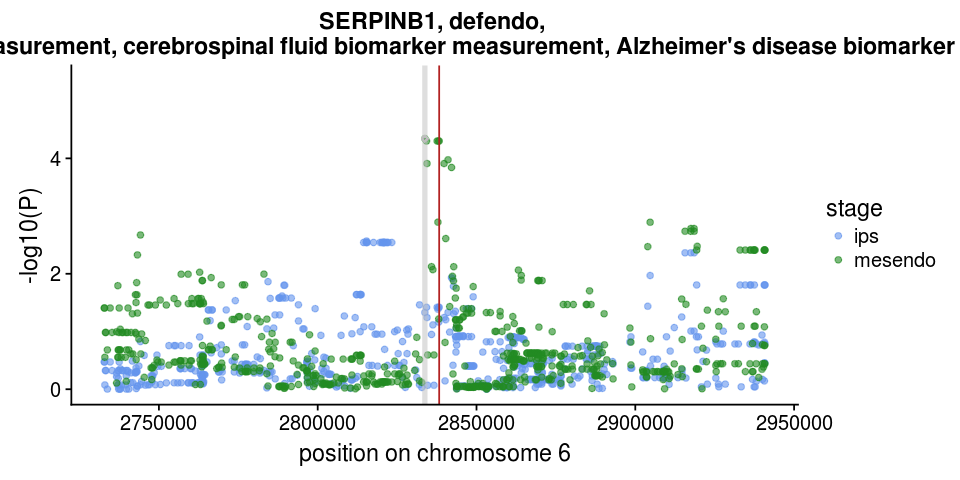

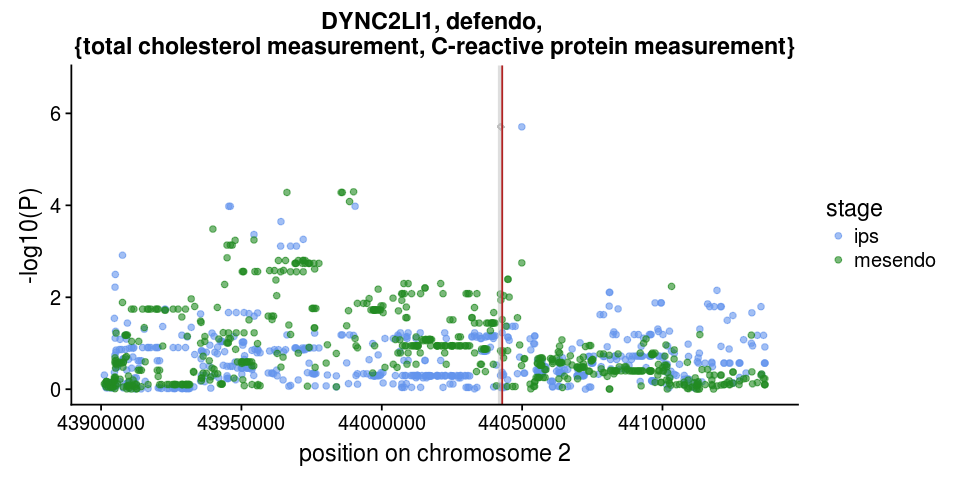

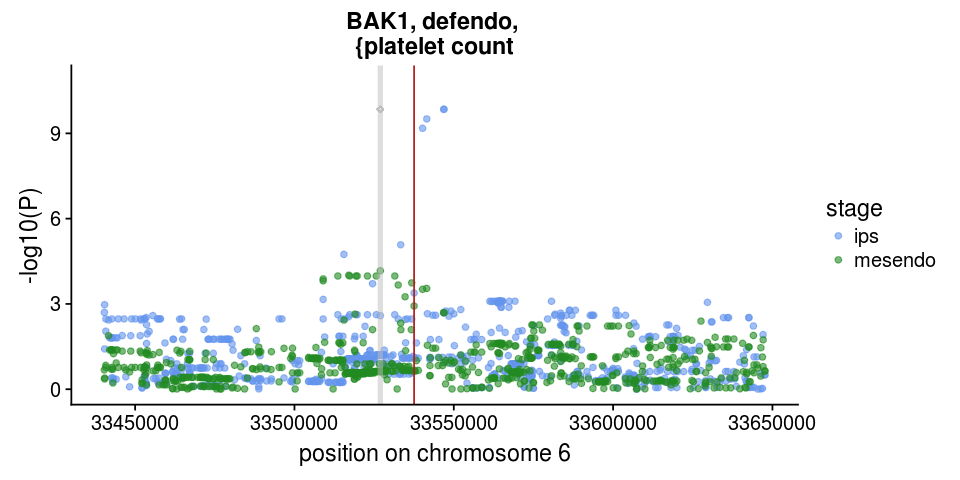

In [89]:
res = gwas_nogtex_noips
# i = which(res$feature =="ENSG00000152359_POC5")
for (i in 1:nrow(res)){
    if (i != 12 & i != 19 & i != 25){ next }
    gene = res$feature[i]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
    df = rbind(df0,df1)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
    p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+1)) 
    p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
    p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "grey", pch = 23, size = 1)
    options(repr.plot.width = 8, repr.plot.height = 4)
    gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
    p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage,
                       ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
#     print(i)
    print(p)
}

[1] "{basophil count, eosinophil count; eosinophil count; eosinophil percentage of granulocytes; neutrophil percentage of granulocytes}"

Warning message:
“Removed 1 rows containing missing values (geom_vline).”

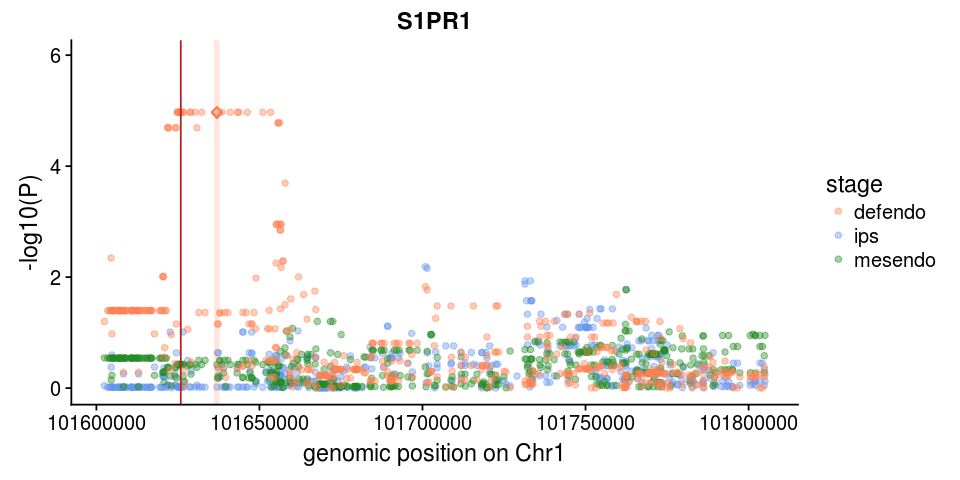

In [99]:
res = gwas_nogtex_noips
i = grep("S1PR1",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "coral", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene)) 
res[i,"GWAS_Annotation"]
p

[1] "{A1C measurement; alkaline phosphatase measurement; blood metabolite measurement; coronary heart disease; e-selectin measurement; erythrocyte count; large artery stroke, coronary heart disease; low density lipoprotein cholesterol measurement; soluble P-selectin measurement; stroke, coronary heart disease; total cholesterol measurement; urinary metabolite measurement};{alkaline phosphatase measurement; angiotensin converting enzyme activity measurement; blood metabolite measurement; coronary artery disease; erythrocyte count; hematocrit; hemoglobin measurement; venous thromboembolism};{glucose-dependent insulinotropic peptide measurement, glucose tolerance test; granulocyte count; Ischemic stroke; leukocyte count; low density lipoprotein cholesterol measurement; myeloid white cell count; neutrophil count; neutrophil count, basophil count; neutrophil count, eosinophil count; tonsillectomy risk measurement; total cholesterol measurement; type II diabetes mellitus};{alkaline phosphatase measurement; blood metabolite measurement; cadherin-5 measurement; carbohydrate sulfotransferase 15 measurement; CD109 antigen measurement; e-selectin measurement; endoglin measurement; factor VIII measurement; hematocrit; hepatocyte growth factor receptor measurement; insulin receptor measurement; intercellular adhesion molecule 2 measurement; iron biomarker measurement, ferritin measurement; low density lipoprotein cholesterol measurement; OX-2 membrane glycoprotein measurement; P-Selectin measurement; platelet glycoprotein 4 measurement; protein jagged-1 measurement; toll-like receptor 4:Lymphocyte antigen 96 complex measurement; vascular endothelial growth factor receptor 2 measurement; vascular endothelial growth factor receptor 3 measurement}"

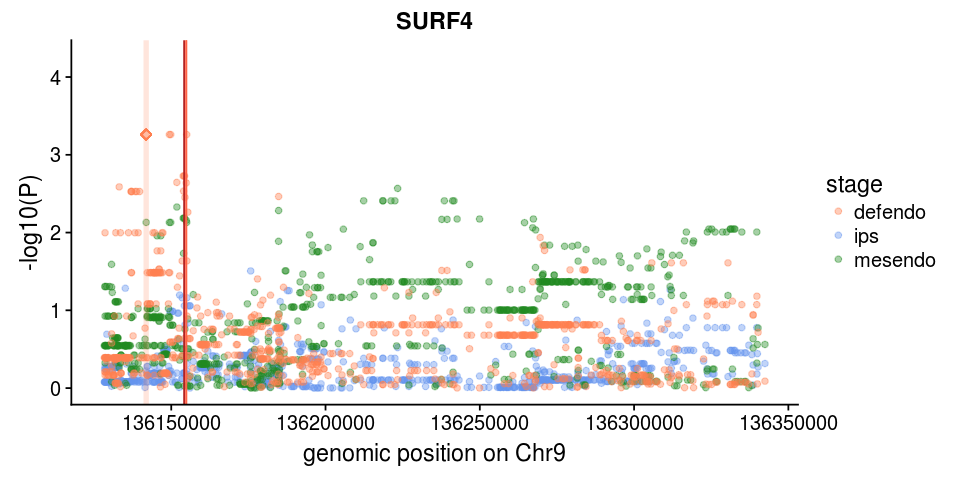

In [107]:
res = gwas_nogtex_noips
i = grep("SURF4",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "coral", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],"\\};\\{"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
gwas_pos3 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[3]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene)) 
res[i,"GWAS_Annotation"]
p

[1] "{L-arginine measurement; metabolite measurement; partial thromboplastin time; superoxide dismutase [Mn], mitochondrial measurement}"

Warning message:
“Removed 1 rows containing missing values (geom_vline).”

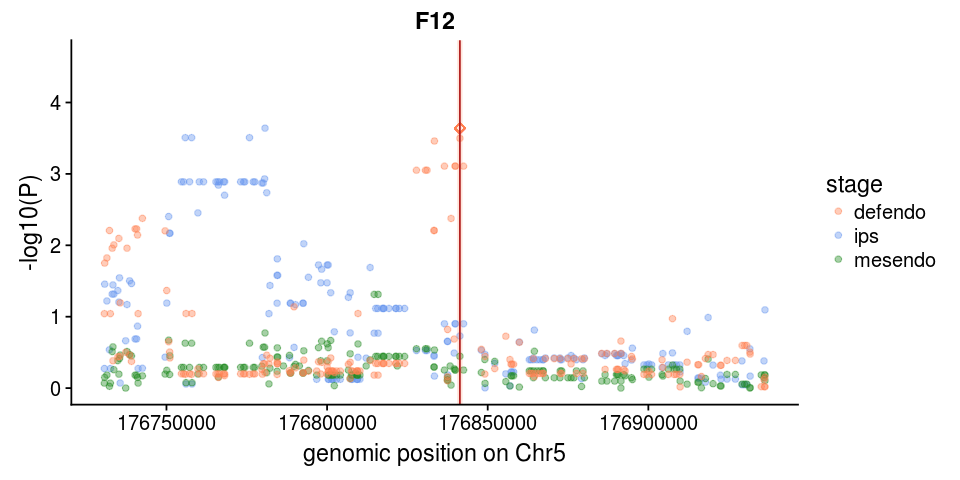

In [102]:
res = gwas_nogtex_noips
i = grep("F12",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "coral", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene)) 
res[i,"GWAS_Annotation"]
p

[1] "{diastolic blood pressure}"

Warning message:
“Removed 1 rows containing missing values (geom_vline).”

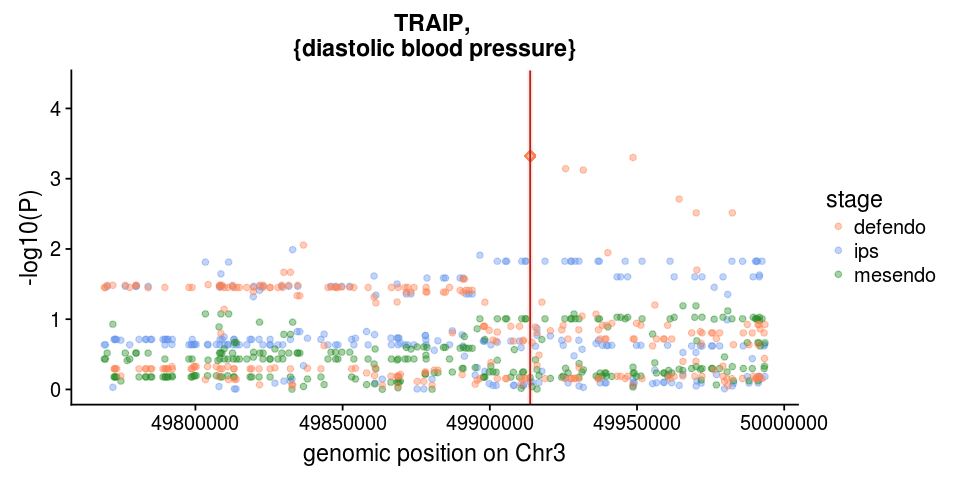

In [100]:
res = gwas_nogtex_noips
i = grep("TRAIP",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "coral", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(paste0(gsub(".*_","",gene), 
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
res[i,"GWAS_Annotation"]
p

[1] "{alcohol drinking}"

Warning message:
“Removed 1 rows containing missing values (geom_vline).”

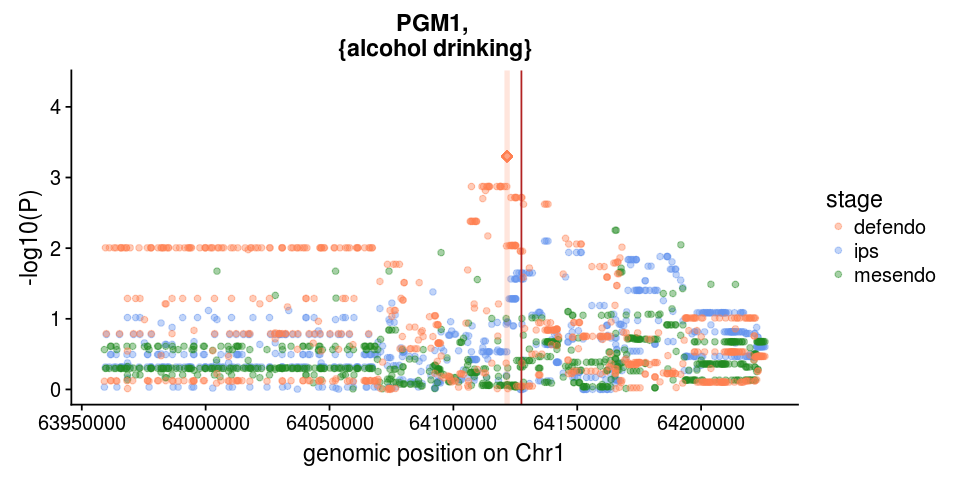

In [97]:
res = gwas_nogtex_noips
i = grep("PGM1",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "coral", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(paste0(gsub(".*_","",gene), 
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
res[i,"GWAS_Annotation"]
p

In [189]:
eQTL_histones_filename <- "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_chipseq_overlaps/all_qtl_results_combined.overlap_w_vallier_histone_marks.tsv"
eQTL_histones <- read.csv(eQTL_histones_filename, sep = "\t")
head(eQTL_histones)

snp_id          Unnamed..0 beta.mean beta_se   empirical_feature_p_value
1 6_31132414_G_A    24       -1.386281 0.1083733 1.592971e-18             
2 6_32634922_A_G   117       -1.270786 0.1469673 1.977147e-11             
3 6_32634922_A_G  1879       -1.375988 0.1478612 8.485500e-15             
4 6_32634922_A_G  3587       -1.438379 0.1499301 3.298243e-12             
5 9_136227260_A_G   20       -1.371767 0.1094063 1.461609e-19             
6 9_136227260_A_G 1851       -1.410832 0.1143974 6.363028e-20             
  p_value.mean snp_id.1        feature                  global_corr_p_value
1 1.823854e-37 6_31132414_G_A  ENSG00000204531_POU5F1   5.264237e-16       
2 5.299864e-18 6_32634922_A_G  ENSG00000179344_HLA-DQB1 1.340269e-09       
3 1.328104e-20 6_32634922_A_G  ENSG00000179344_HLA-DQB1 1.519887e-12       
4 8.500689e-22 6_32634922_A_G  ENSG00000179344_HLA-DQB1 5.981274e-10       
5 4.608624e-36 9_136227260_A_G ENSG00000148291_SURF2    5.796154e-17       
6 6.036677e-35 9_136227260_A_G ENSG00000148291_SURF2    2.949861e-17       
  chrom ⋯ H3K4me3 H3K4me3_h0 H3K4me3_h24 H3K36me3_h48 H3K36me3_h24 H3K36me3_h36
1 6     ⋯ False   False      False       True         True         True        
2 6     ⋯ False   False      False       False        False        False       
3 6     ⋯ False   False      False       False        False        False       
4 6     ⋯ False   False      False       False        False        False       
5 9     ⋯ False   False      False       True         True         True        
6 9     ⋯ False   False      False       True         True         True        
  H3K36me3_h72 H3K36me3_h0 H3K36me3_h12 H3K36me3
1 True         True        True         True    
2 False        False       False        False   
3 False        False       False        False   
4 False        False       False        False   
5 True         True        True         True    
6 True         True        True         True

In [133]:
colnames(eQTL_histones)

[1] "snp_id"                    "Unnamed..0"               
 [3] "beta.mean"                 "beta_se"                  
 [5] "empirical_feature_p_value" "p_value.mean"             
 [7] "snp_id.1"                  "feature"                  
 [9] "global_corr_p_value"       "chrom"                    
[11] "pos"                       "ref_allele"               
[13] "alt_allele"                "permutation_0"            
[15] "permutation_1"             "permutation_2"            
[17] "permutation_3"             "permutation_4"            
[19] "permutation_5"             "permutation_6"            
[21] "permutation_7"             "permutation_8"            
[23] "permutation_9"             "stage"                    
[25] "sign.mean"                 "stage_specific"           
[27] "p_value.int"               "q_value"                  
[29] "beta.int"                  "sign.int"                 
[31] "H3K27me3_h12"              "H3K27me3_h24"             
[33] "H3K27me3_h48"              "H3K27me3"                 
[35] "H3K27me3_h0"               "H3K27me3_h72"             
[37] "H3K27ac_h12"               "H3K27ac_h0"               
[39] "H3K27ac_h48"               "H3K27ac_h72"              
[41] "H3K27ac"                   "H3K27ac_h24"              
[43] "H3K27ac_h36"               "H3K4me1_h0"               
[45] "H3K4me1_h36"               "H3K4me1_h24"              
[47] "H3K4me1"                   "H3K4me1_h12"              
[49] "H3K4me1_h48"               "H3K4me1_h72"              
[51] "H3K4me3_h36"               "H3K4me3_h72"              
[53] "H3K4me3_h48"               "H3K4me3_h12"              
[55] "H3K4me3"                   "H3K4me3_h0"               
[57] "H3K4me3_h24"               "H3K36me3_h48"             
[59] "H3K36me3_h24"              "H3K36me3_h36"             
[61] "H3K36me3_h72"              "H3K36me3_h0"              
[63] "H3K36me3_h12"              "H3K36me3"

In [194]:
eQTL_histones[grep("FBLN1",eQTL_histones$feature),"stage"]

[1] "defendo" "ips"

In [198]:
# iPSC hit (FBLN1)
eQTL_histones[grep("FBLN1",eQTL_histones$feature),][2,][which(eQTL_histones[grep("FBLN1",eQTL_histones$feature),][2,] == "True")]

sign.mean H3K36me3_h48 H3K36me3_h24 H3K36me3_h36 H3K36me3_h72 H3K36me3_h0
3692 True      True         True         True         True         True       
     H3K36me3_h12 H3K36me3
3692 True         True

In [199]:
# defendo hit (FBLN1)
eQTL_histones[grep("FBLN1",eQTL_histones$feature),][1,][which(eQTL_histones[grep("FBLN1",eQTL_histones$feature),][1,] == "True")]

sign.mean sign.int H3K27ac_h12 H3K27ac_h0 H3K27ac_h48 H3K27ac_h72 H3K27ac
59 True      True     True        True       True        True        True   
   H3K27ac_h24 H3K27ac_h36 H3K4me1_h24 H3K4me1 H3K4me1_h12 H3K4me3_h36
59 True        True        True        True    True        True       
   H3K4me3_h72 H3K4me3_h48 H3K4me3_h12 H3K4me3 H3K4me3_h0 H3K4me3_h24
59 True        True        True        True    True       True

feature               snp_id          stage   beta.mean beta_se   
58 ENSG00000077942_FBLN1 22_45898592_G_C defendo 0.4505297 0.07487658
   empirical_feature_p_value p_value.mean global_corr_p_value snp_chromosome
58 3.446536e-05              1.777191e-09 0.001038239         22            
   snp_position ⋯ Brain_Putamen_basal_ganglia_LD
58 45898592     ⋯ -                             
   Brain_Cerebellar_Hemisphere_Variant Brain_Cerebellar_Hemisphere_Annotation
58 -                                   -                                     
   Brain_Cerebellar_Hemisphere_LD Artery_Tibial_Variant
58 -                              -                    
   Artery_Tibial_Annotation Artery_Tibial_LD Lung_Variant Lung_Annotation
58 -                        -                -            -              
   Lung_LD
58 -

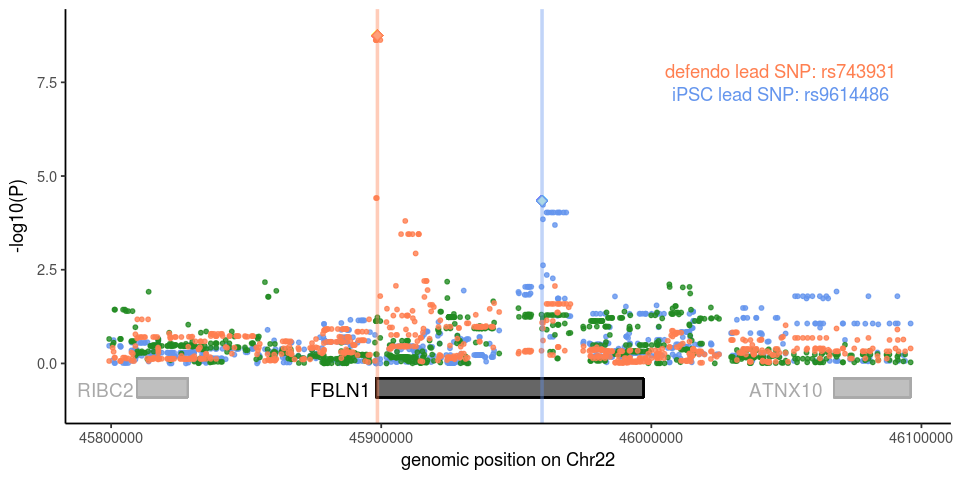

In [250]:
res = anno_allres
i = grep("FBLN1",res$feature)
res[i,][1,]
gene_start = 45898118
gene_end = 45997015
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
# head(df0)
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
# head(df1)
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
# head(df2)
df = rbind(df0,df1,df2)
# head(df)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-1.1,-log10(m)+0.2)) 
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.9, ymax = -0.4), 
                  color = "black", alpha = 0.1, fill = "dimgrey")
p <- p + annotate("text", x = 45885000, y = -0.7, label = gsub(".*_","",gene), col = "black", size = 4)
p <- p + annotate("text", x = 46050000, y = -0.7, label = "ATNX10", col = "darkgrey", size = 4)
p = p + geom_rect(mapping = aes(xmin = 46067678, xmax = max(df$pos), ymin = -0.9, ymax = -0.4), 
                  color = "darkgrey", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = 45798000, y = -0.7, label = "RIBC2", col = "darkgrey", size = 4)
p = p + geom_rect(mapping = aes(xmin = 45809572, xmax = 45828376, ymin = -0.9, ymax = -0.4), 
                  color = "darkgrey", alpha = 0.1, fill = "grey")
p = p + geom_vline(xintercept = res$snp_position[i][1], col = "coral", alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res$snp_position[i][2], col = "cornflowerblue", alpha = 0.4, size = 1)
p = p + geom_point(aes(x = res$snp_position[i][1], y = -log10(m)), col = "coral", pch = 23, 
                   size = 2, fill = "lightsalmon", alpha = 0.6)
p = p + geom_point(aes(x = res$snp_position[i][2], y = -log10(min(df0$p_value))), col = "cornflowerblue", pch = 23, 
                   size = 2, fill = "lightblue", alpha = 0.6)
p <- p + annotate("text", x = 46048000, y = 7.8, label = "defendo lead SNP: rs743931", col = "coral")
p <- p + annotate("text", x = 46048000, y = 7.2, label = "iPSC lead SNP: rs9614486", col = "cornflowerblue")

p = p + theme_classic() 
p = p + theme(legend.position = "none", panel.border = element_blank())
options(repr.plot.width = 8, repr.plot.height = 4)
p

feature                 snp_id          stage   beta.mean beta_se  
226 ENSG00000174469_CNTNAP2 7_148106871_C_T defendo 0.5201186 0.0890415
    empirical_feature_p_value p_value.mean global_corr_p_value snp_chromosome
226 1.830292e-08              5.179343e-09 1.397291e-06        7             
    snp_position ⋯ Brain_Putamen_basal_ganglia_LD
226 148106871    ⋯ -                             
    Brain_Cerebellar_Hemisphere_Variant Brain_Cerebellar_Hemisphere_Annotation
226 -                                   -                                     
    Brain_Cerebellar_Hemisphere_LD Artery_Tibial_Variant
226 -                              -                    
    Artery_Tibial_Annotation Artery_Tibial_LD Lung_Variant Lung_Annotation
226 -                        -                -            -              
    Lung_LD
226 -

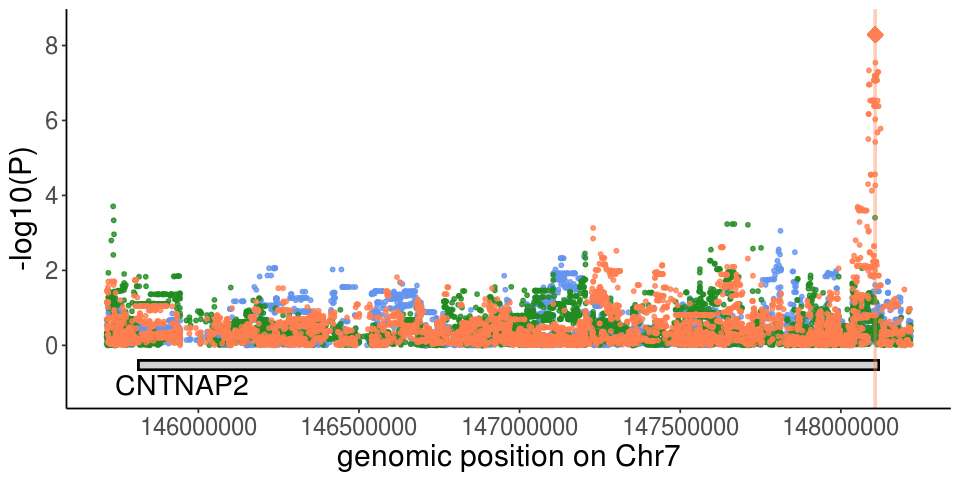

In [12]:
res = anno_allres
i = grep("CNTNAP2",res$feature)
res[i,]
gene_start = 145813453
gene_end = 148118090
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-1.2,-log10(m)+0.2)) 
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.65, ymax = -0.4), 
                  color = "black", alpha = 0.1, fill = "lightgrey")
p <- p + annotate("text", x = 145950000, y = -1.05, label = gsub(".*_","",gene), col = "black", size = 6)
p = p + geom_point(aes(x = res$snp_position[i][1], y = -log10(m)), col = "coral", pch = 23, 
                   size = 3, fill = "coral", alpha = 0.6)
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.4, size = 1)
# p <- p + annotate("text", x = 147700000, y = 7, label = "defendo lead SNP: \nrs9648854", col = "coral")
p = p + theme_classic() 
p = p + theme(legend.position = "none", panel.border = element_blank(), text = element_text(size = 18))
options(repr.plot.width = 8, repr.plot.height = 4)
p

In [195]:
eQTL_histones[grep("SPP1",eQTL_histones$feature),"stage"]

[1] "ips"     "mesendo" "defendo"

In [135]:
# iPSC hit (SPP1)
eQTL_histones[grep("SPP1",eQTL_histones$feature),][1,][which(eQTL_histones[grep("SPP1",eQTL_histones$feature),][1,] == "True")]

sign.mean sign.int H3K4me1_h0 H3K4me1_h36 H3K4me1_h24 H3K4me1 H3K4me1_h12
37 True      True     True       True        True        True    True       
   H3K4me1_h48 H3K4me1_h72 H3K4me3_h36 H3K4me3_h12 H3K4me3 H3K4me3_h0
37 True        True        True        True        True    True      
   H3K4me3_h24
37 True

In [132]:
# mesendo hit (SPP1)
eQTL_histones[grep("SPP1",eQTL_histones$feature),][2,][which(eQTL_histones[grep("SPP1",eQTL_histones$feature),][2,] == "True")]

sign.mean H3K36me3_h48 H3K36me3_h24 H3K36me3_h36 H3K36me3_h0 H3K36me3_h12
4153 True      True         True         True         True        True        
     H3K36me3
4153 True

In [136]:
# defendo hit (SPP1)
eQTL_histones[grep("SPP1",eQTL_histones$feature),][3,][which(eQTL_histones[grep("SPP1",eQTL_histones$feature),][3,] == "True")]

sign.mean stage_specific H3K4me1_h36 H3K4me1 H3K36me3_h0 H3K36me3_h12
4695 True      True           True        True    True        True        
     H3K36me3
4695 True

In [69]:
res = gwas_nogtex_noips
i = grep("SPP1",res$feature)
res[i,]
snp_name = "rs12506273"
gwas_snp = "rs12506930"
gene_start = 88896819
gene_end = 88904562
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(alpha = 0.5, size = 1)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
# p = ggplot(df[df$stage == "mesendo",], aes(x = pos, y = -log10(p_value)))
# p = p + geom_point(alpha = 0.8, col = "forestgreen")  
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-1.1,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "forestgreen", alpha = 0.4, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "forestgreen", pch = 23, 
                   size = 3, fill = "mediumseagreen", alpha = 0.6)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 1)
# p = p + ggtitle(paste0(gsub(".*_","",gene), " ",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
# p <- p + annotate("text", x = 88950000, y = 5.8, label = snp_name, col = "forestgreen")
# p <- p + annotate("text", x = 88950000, y = 5, label = gwas_snp, col = "firebrick")
p <- p + annotate("text", x = 88835000, y = 8, label = "LD = 0.98")
p <- p + annotate("text", x = 88970000, y = 7.8, label = "mesendo lead SNP", col = "forestgreen")
p <- p + annotate("text", x = 88970000, y = 7, label = "GWAS SNP {bone density}", col = "firebrick")
p <- p + annotate("text", x = 88915000, y = -0.7, label = gsub(".*_","",gene), col = "black", size = 4)
p <- p + annotate("text", x = 89010000, y = -0.7, label = "PKD2", col = "darkgrey", size = 4)
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.9, ymax = -0.4), 
                  color = "black", alpha = 0.1, fill = "dimgrey")
p = p + geom_rect(mapping = aes(xmin = 88928820, xmax = 88998929, ymin = -0.9, ymax = -0.4), 
                  color = "darkgrey", alpha = 0.1, fill = "grey")
p = p + theme_classic() 
p = p + theme(legend.position = "none", panel.border = element_blank())
# p

snp_id         feature              GWAS_LD             GWAS_Variant    
4113 4_88810216_G_A ENSG00000118785_SPP1 {0.983737738771296} {4_88815986_C_T}
     GWAS_Annotation global_corr_p_value stage   snp_position stage_specific
4113 {bone density}  0.04102435          mesendo 88810216     False         
     q_value p_value.mean beta.mean  p_value.int beta.int sign.int
4113 NA      9.044908e-06 -0.2924321 NA          NA

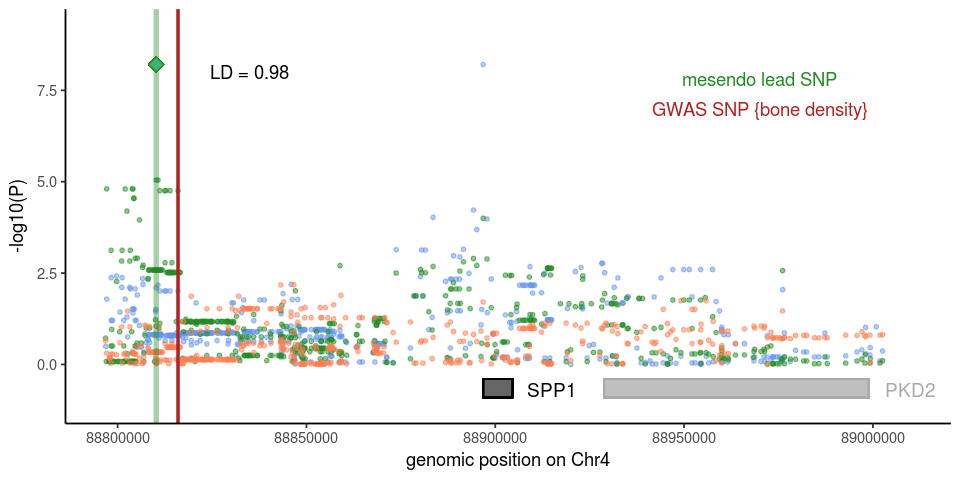

In [70]:
p 

snp_id         feature              GWAS_LD             GWAS_Variant    
2929 1_64121684_G_A ENSG00000079739_PGM1 {0.891938250428816} {1_64127468_C_G}
     GWAS_Annotation    global_corr_p_value stage   snp_position stage_specific
2929 {alcohol drinking} 0.07837731          defendo 64121684     True          
     q_value   p_value.mean beta.mean  p_value.int beta.int      sign.int
2929 0.2443536 0.0005005344 -0.3103455 0.6143742   -0.0002236477 False

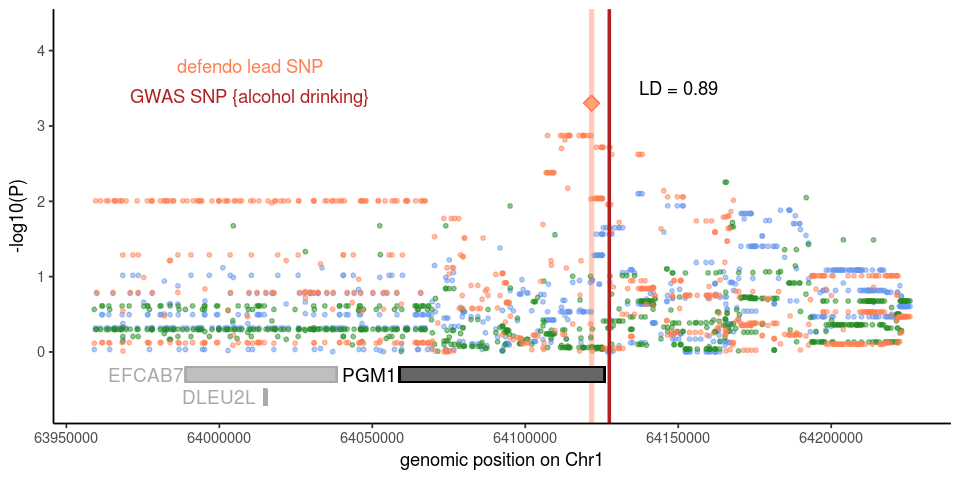

In [119]:
res = gwas_nogtex_noips
i = grep("PGM1",res$feature)
res[i,]
snp_name = "rs7519583"
gwas_snp = "rs2749097"
gene_start = 64058947
gene_end = 64125916
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(alpha = 0.5, size = 1)  
p = p + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
# p = ggplot(df[df$stage == "defendo",], aes(x = pos, y = -log10(p_value)))
# p = p + geom_point(alpha = 0.8, col = "coral")  
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-0.7,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "coral", alpha = 0.4, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "coral", pch = 23, 
                   size = 3, fill = "lightsalmon", alpha = 0.6)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 1)
# p = p + ggtitle(paste0(gsub(".*_","",gene), " ",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
# p <- p + annotate("text", x = 88950000, y = 5.8, label = snp_name, col = "forestgreen")
# p <- p + annotate("text", x = 88950000, y = 5, label = gwas_snp, col = "firebrick")
p <- p + annotate("text", x = 64150000, y = 3.5, label = "LD = 0.89")
p <- p + annotate("text", x = 64010000, y = 3.8, label = "defendo lead SNP", col = "coral")
p <- p + annotate("text", x = 64010000, y = 3.4, label = "GWAS SNP {alcohol drinking}", col = "firebrick")
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.4, ymax = -0.2), 
                  color = "black", alpha = 0.1, fill = "dimgrey")
p = p + geom_rect(mapping = aes(xmin = 63989043, xmax = 64038364, ymin = -0.4, ymax = -0.2), 
                  color = "darkgrey", alpha = 0.1, fill = "grey")
p = p + geom_rect(mapping = aes(xmin = 64014588, xmax = 64015405, ymin = -0.7, ymax = -0.5), 
                  color = "darkgrey", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = 64049000, y = -0.3, label = gsub(".*_","",gene), col = "black", size = 4)
p <- p + annotate("text", x = 63976000, y = -0.3, label = "EFCAB7", col = "darkgrey", size = 4)
p <- p + annotate("text", x = 64000000, y = -0.6, label = "DLEU2L", col = "darkgrey", size = 4)
p = p + theme_classic() 
p = p + theme(legend.position = "none", panel.border = element_blank())
p

[1] "{atrial fibrillation; response to vaccine, cytokine measurement};{gut microbiome measurement, taxonomic microbiome measurement}"

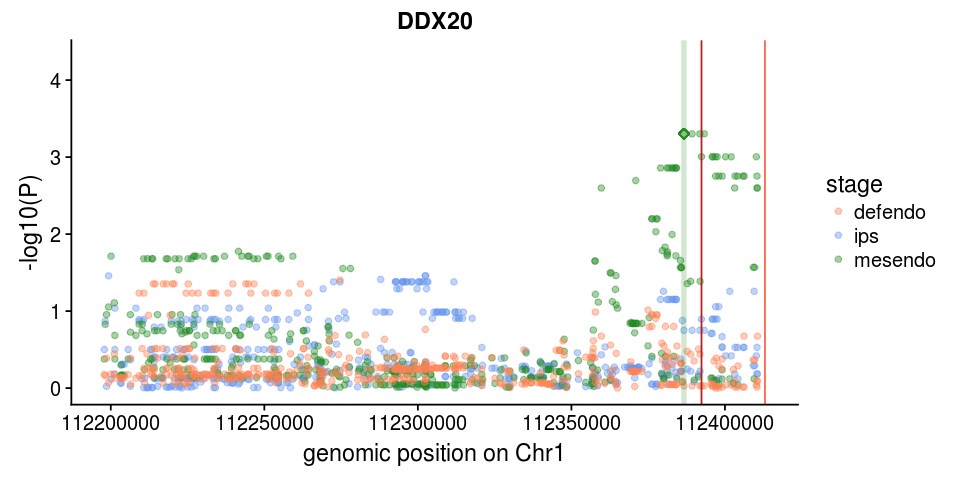

In [104]:
res = gwas_nogtex_noips
i = grep("DDX20",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "forestgreen", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "forestgreen", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene)) 
res[i,"GWAS_Annotation"]
p

[1] "{thyroid stimulating hormone measurement}"

Warning message:
“Removed 1 rows containing missing values (geom_vline).”

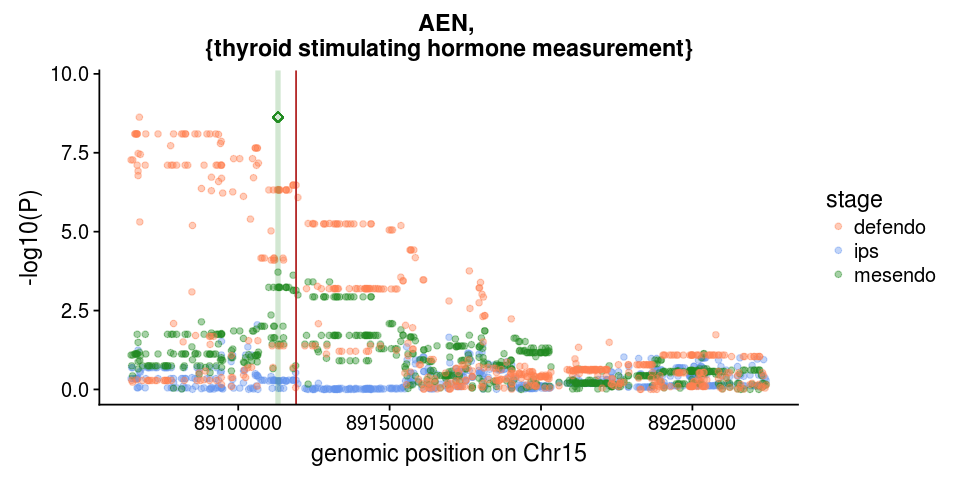

In [95]:
res = gwas_nogtex_noips
i = grep("AEN",res$feature)
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "forestgreen", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "forestgreen", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(paste0(gsub(".*_","",gene), 
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
res[i,"GWAS_Annotation"]
p

[1] "{diastolic blood pressure};{total cholesterol measurement, diastolic blood pressure, triglyceride measurement, systolic blood pressure, hematocrit, ventricular rate measurement, glucose measurement, body mass index, high density lipoprotein cholesterol measurement}"

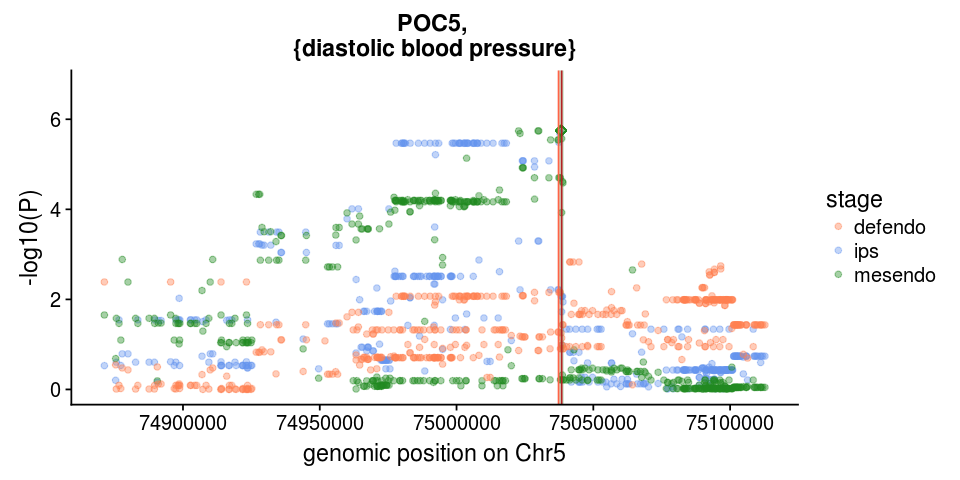

In [94]:
res = gwas_nogtex_noips
i = which(res$feature =="ENSG00000152359_POC5")
gene = res$feature[i]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.4) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "forestgreen", alpha = 0.2, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "forestgreen", pch = 23, size = 2)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 0.5)
gwas_pos2 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[2]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos2), col = "tomato", size = 0.5)
p = p + ggtitle(paste0(gsub(".*_","",gene), 
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
res[i,"GWAS_Annotation"]
p

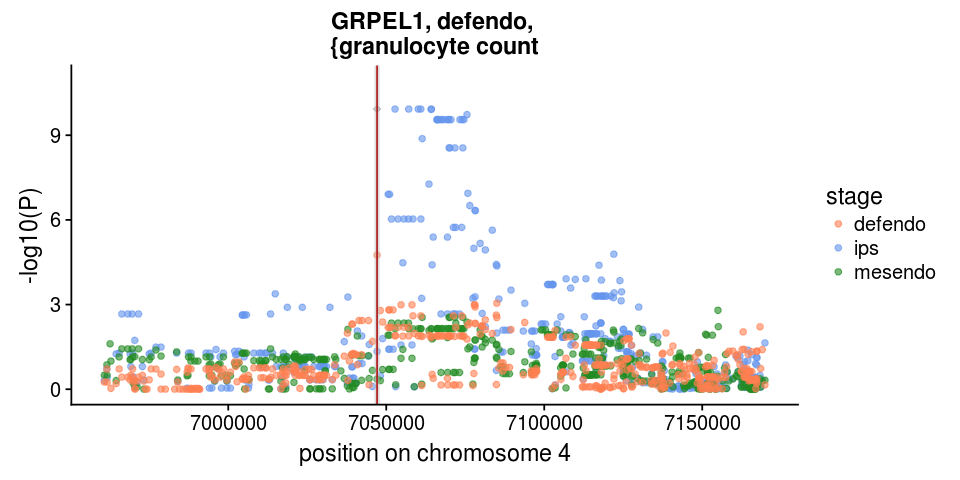

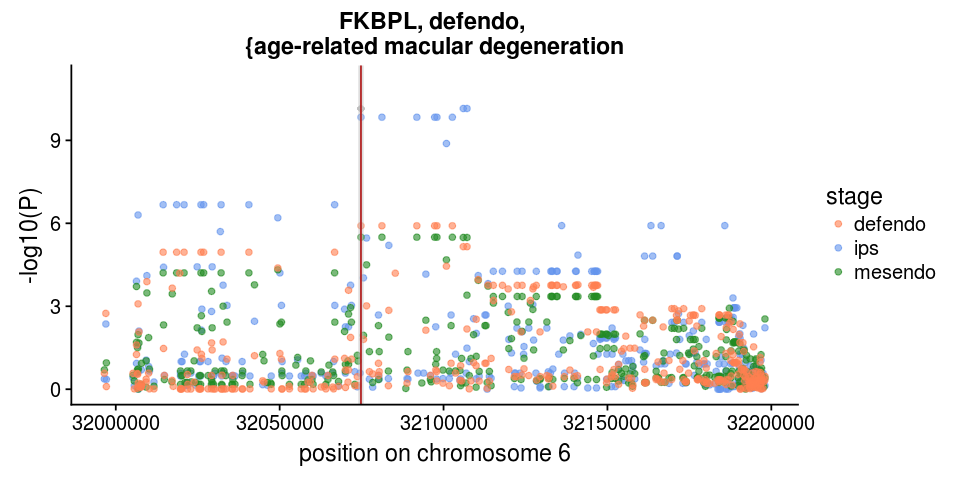

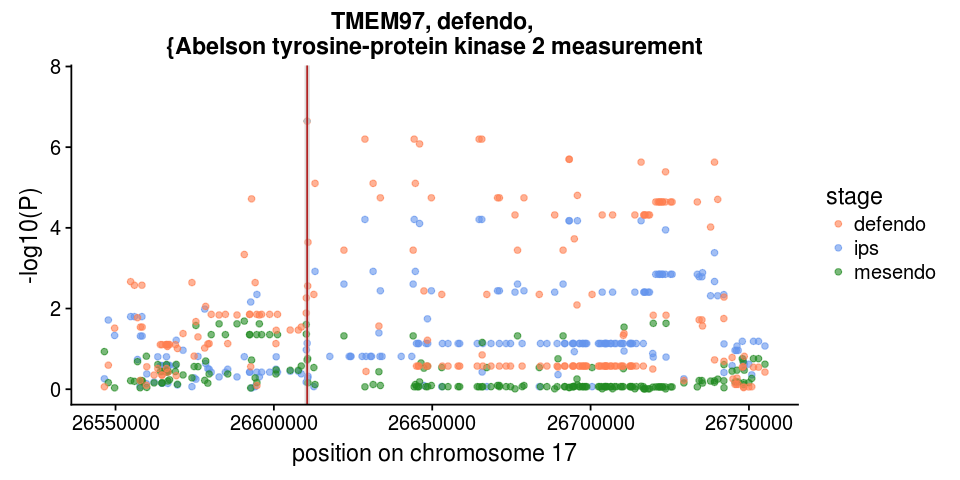

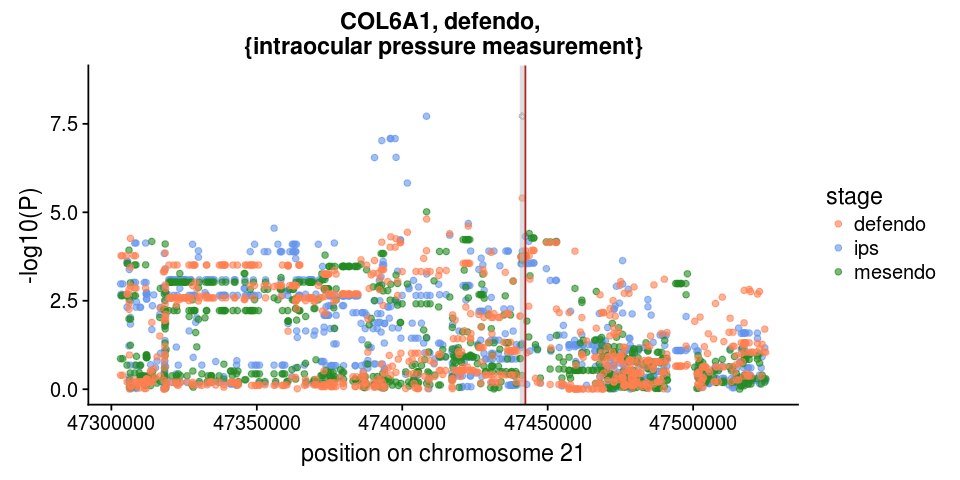

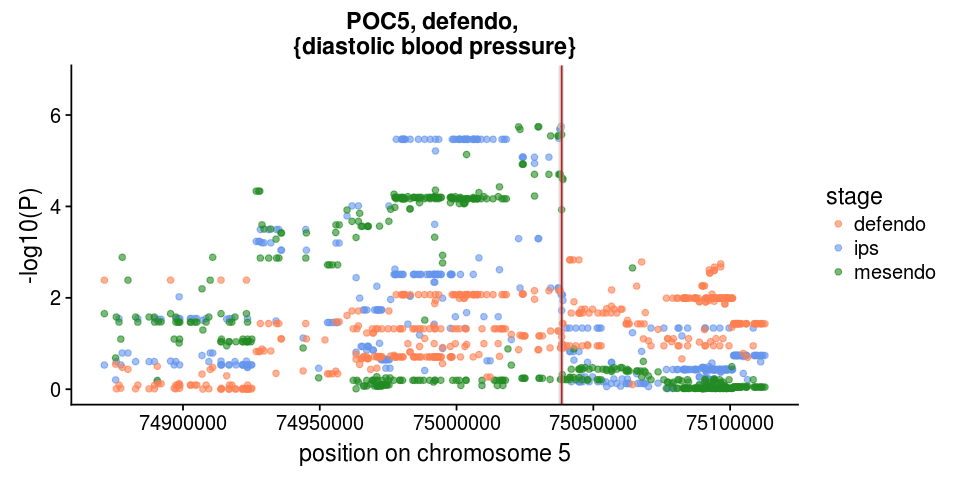

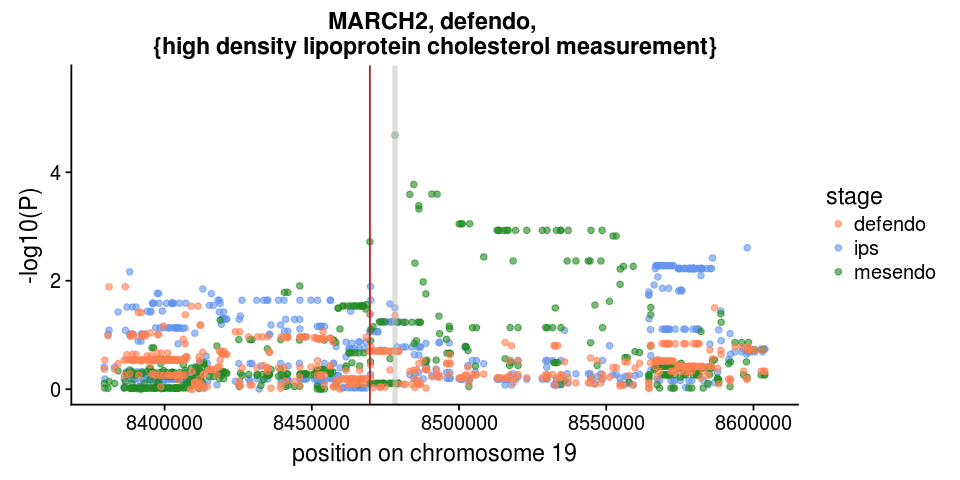

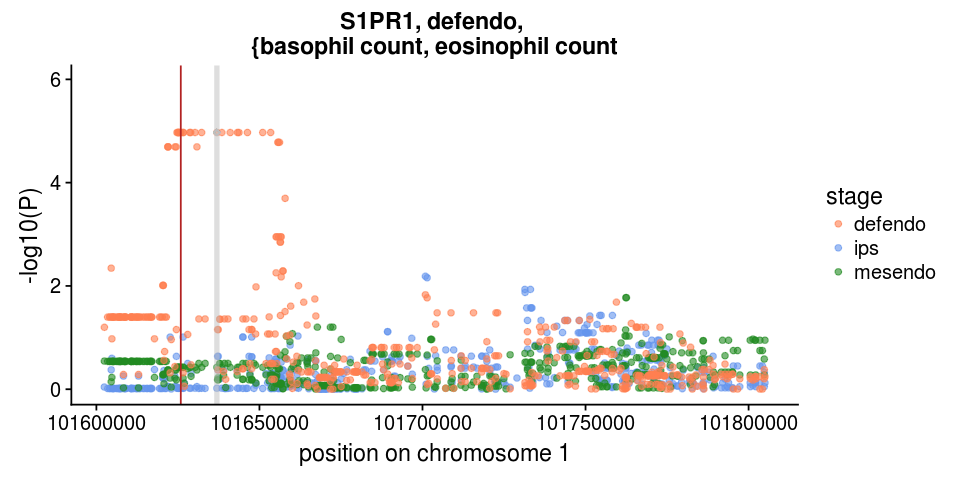

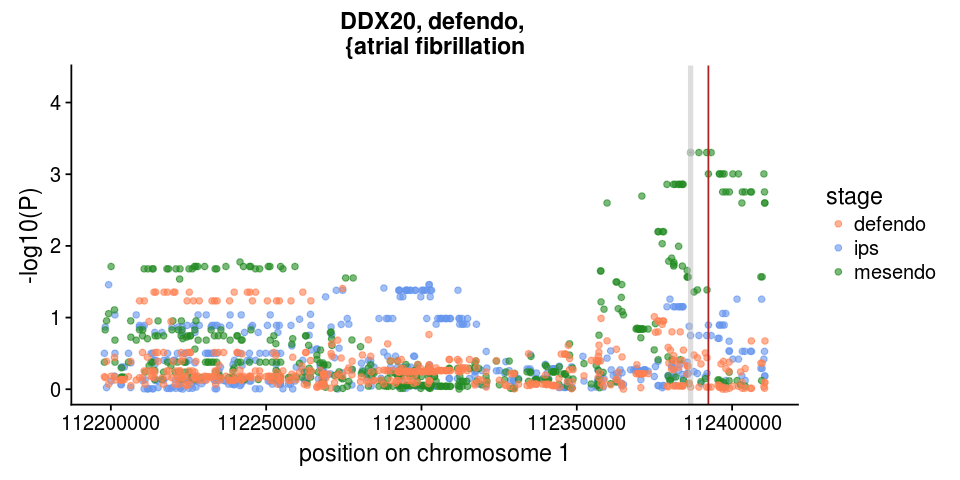

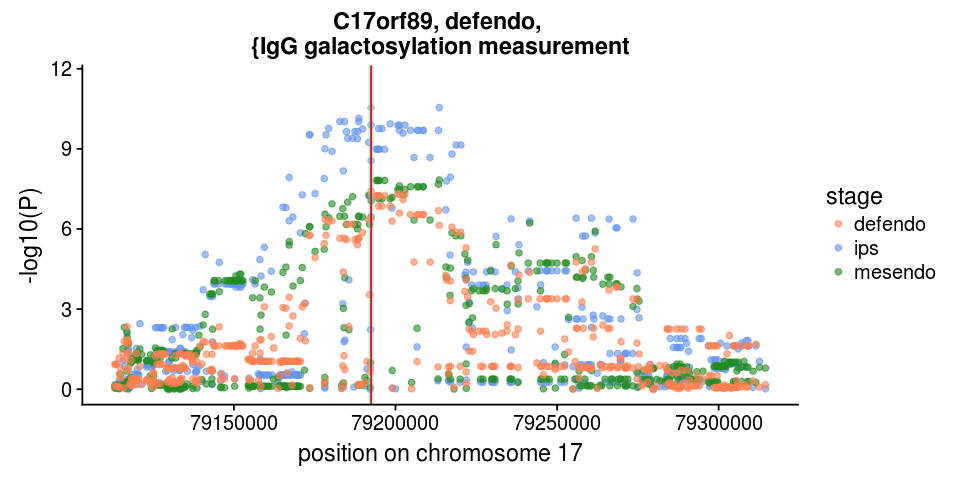

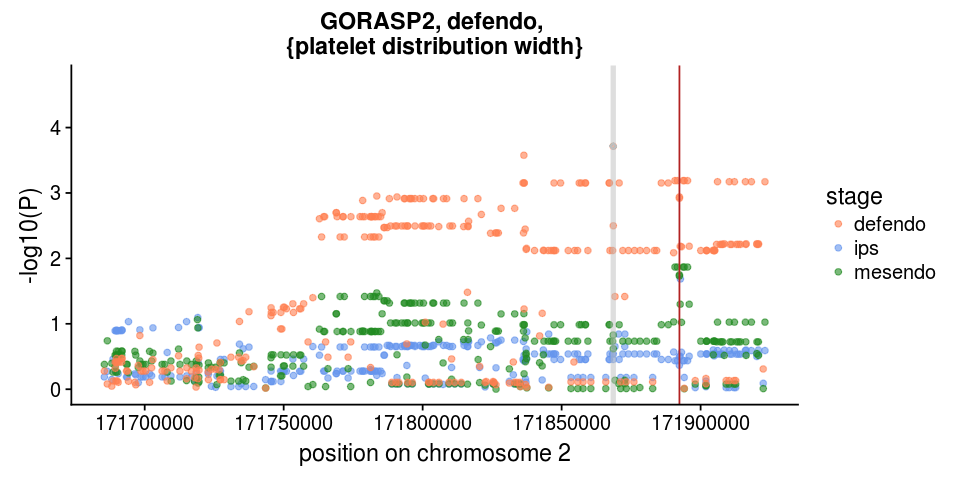

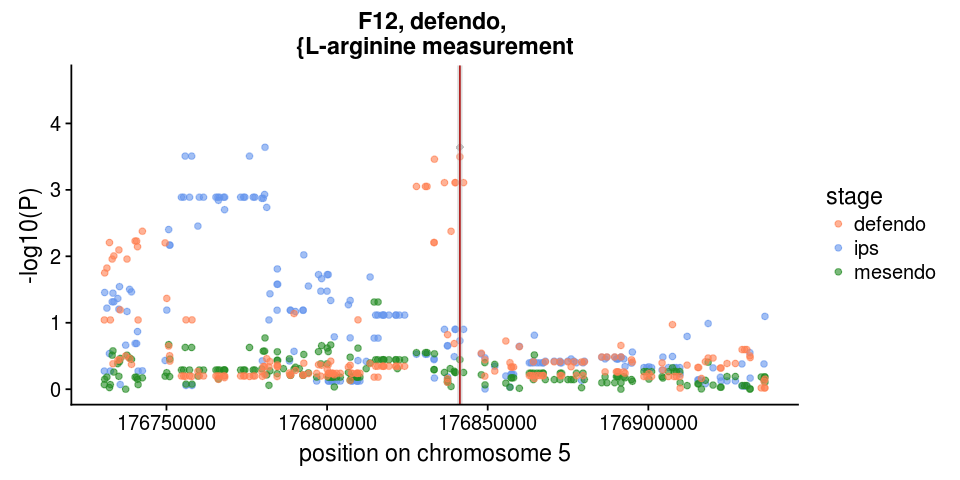

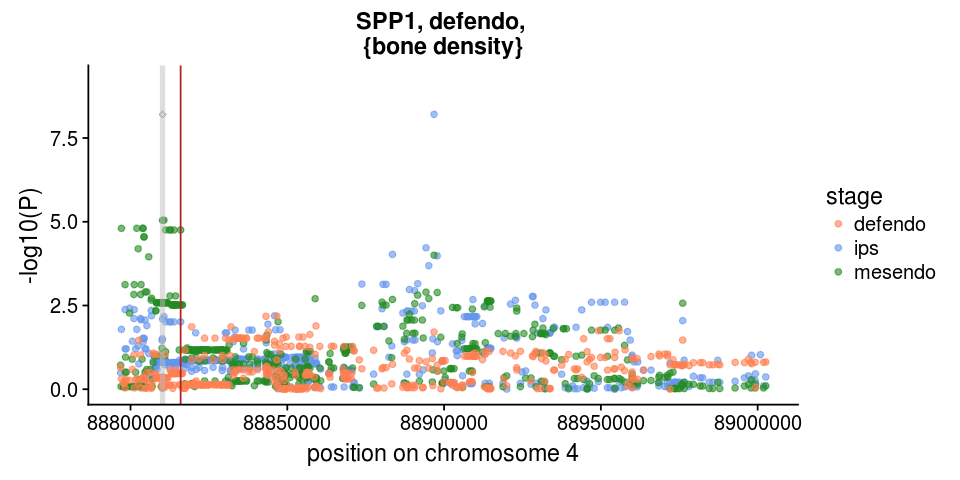

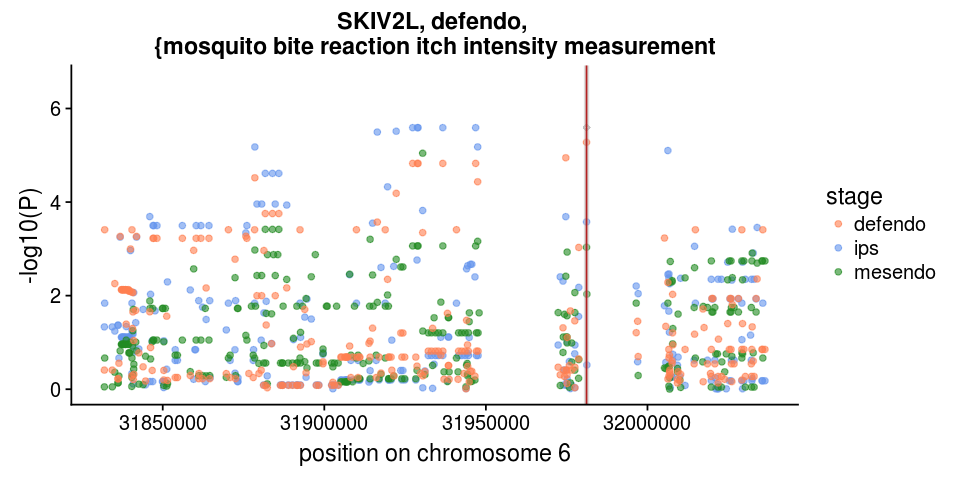

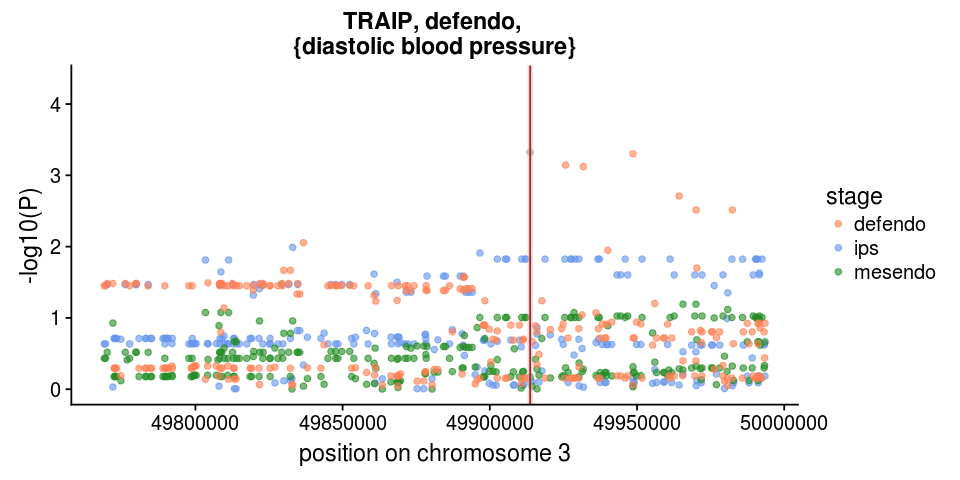

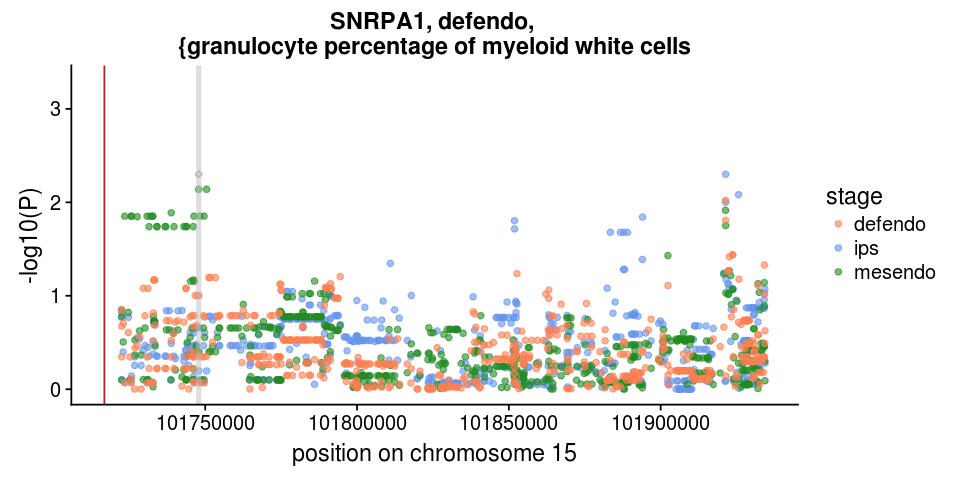

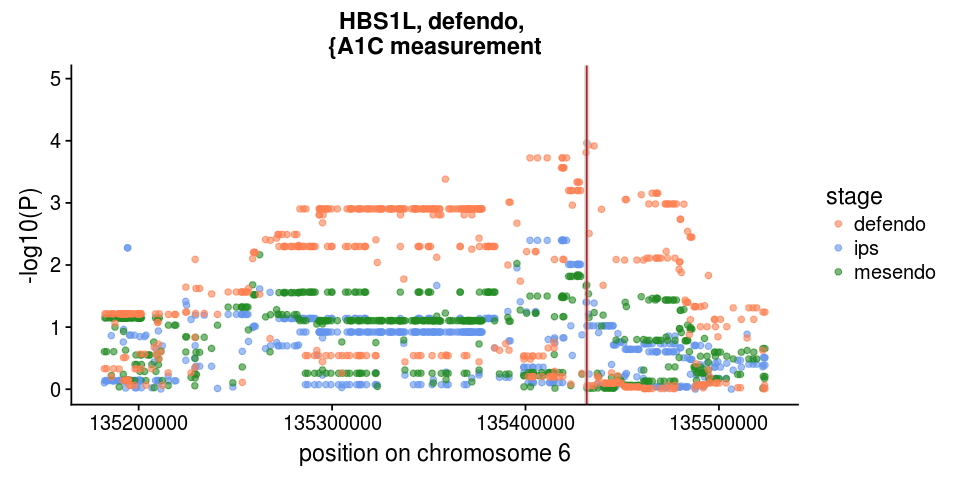

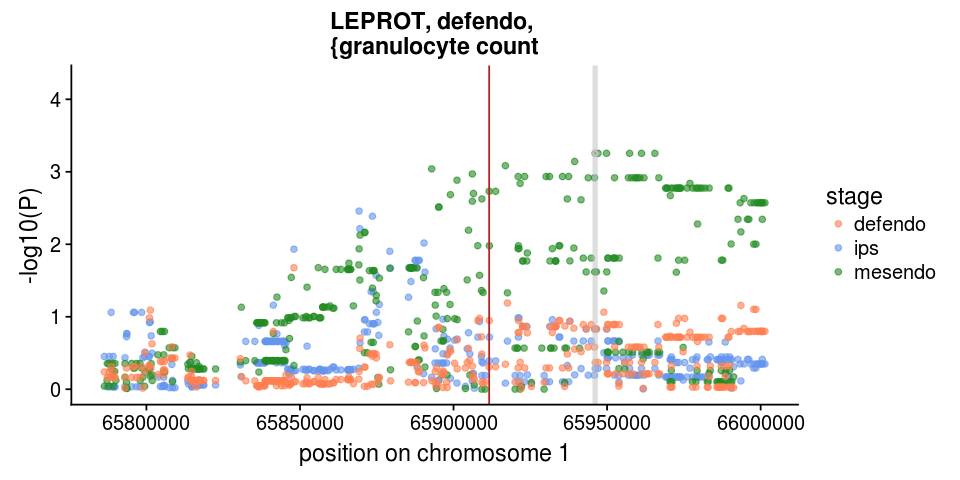

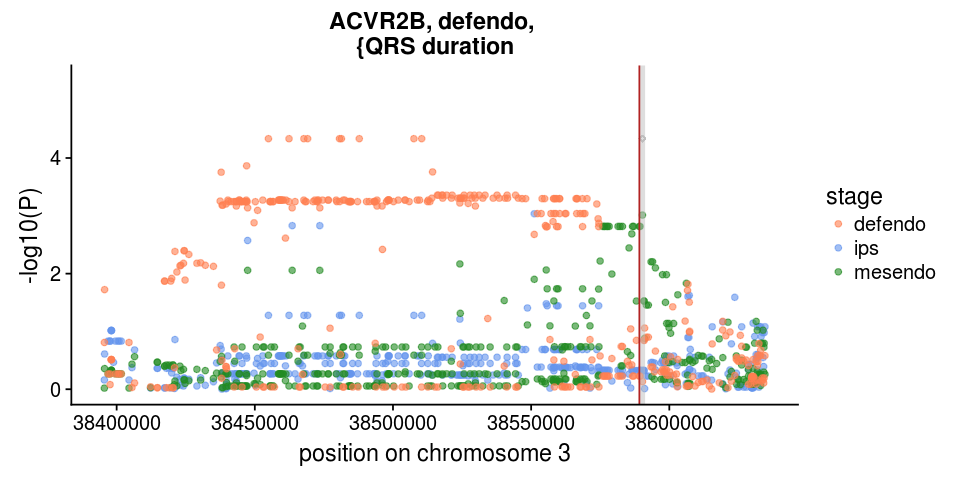

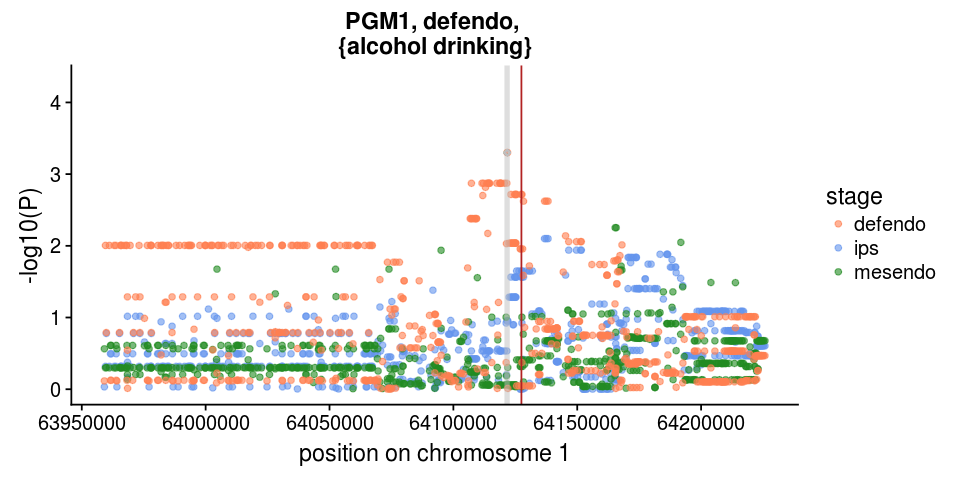

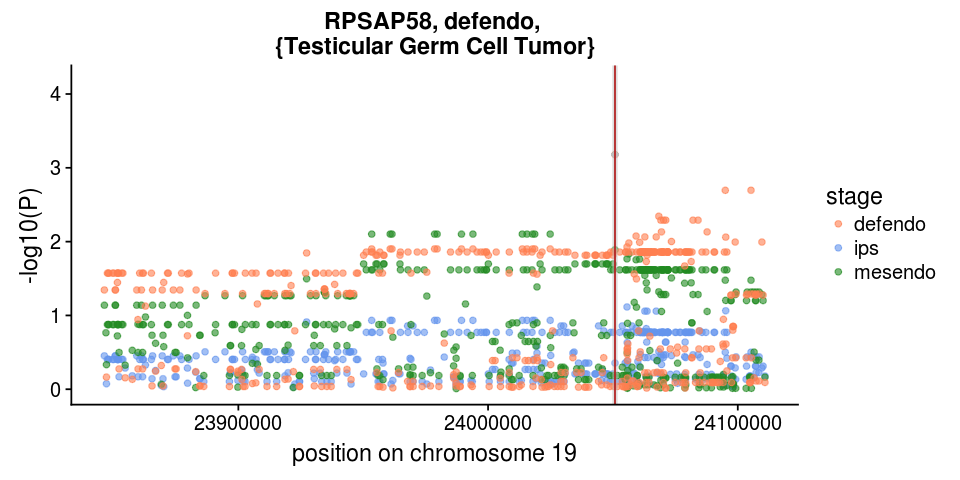

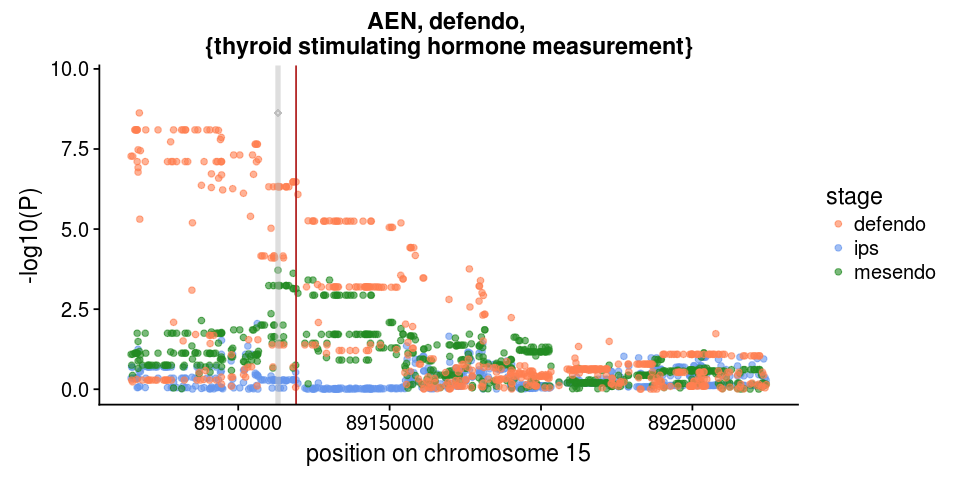

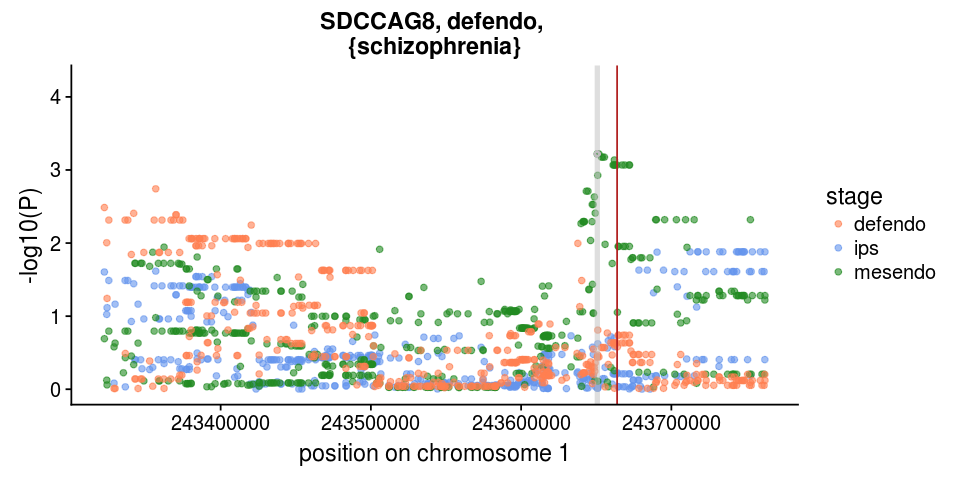

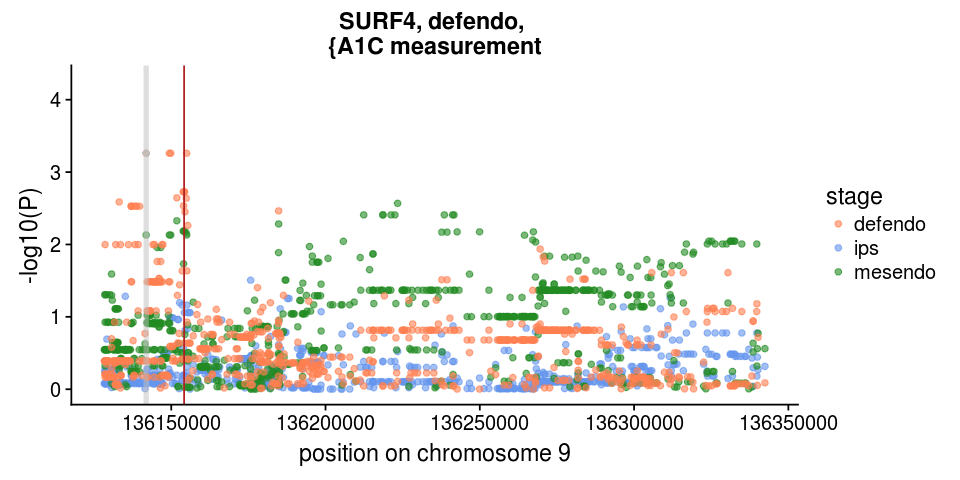

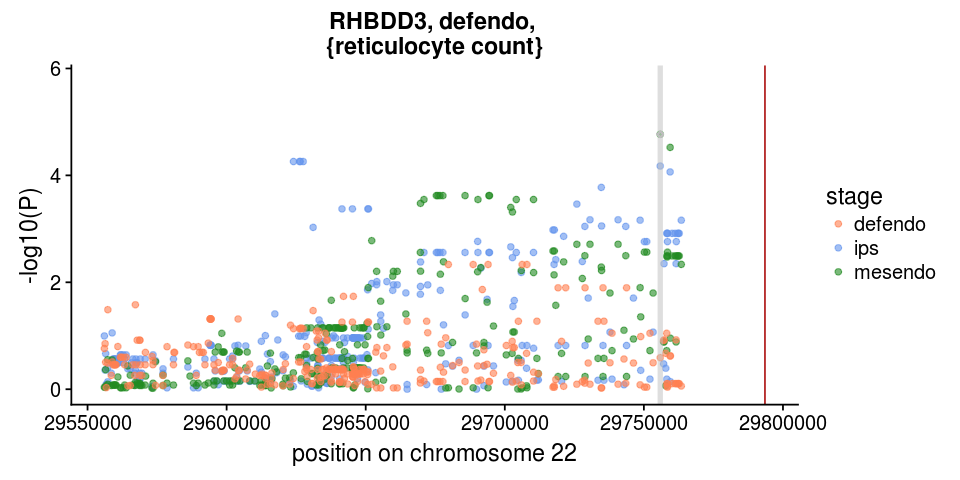

In [87]:
res = gwas_nogtex_noips
# i = which(res$feature =="ENSG00000152359_POC5")
for (i in 1:nrow(res)){
    if (i == 12 | i == 19 | i == 25){ next }
    gene = res$feature[i]
    df0 = res.ips[res.ips$feature == gene,]
    df0$stage = "ips"
    df1 = res.mes[res.mes$feature == gene,]
    df1$stage = "mesendo"
    df2 = res.defendo[res.defendo$feature == gene,]
    df2$stage = "defendo"
    df = rbind(df0,df1,df2)
    m = min(df$p_value)
    p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
    p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
    p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
    p = p + ylim(c(0,-log10(m)+1)) 
    p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
    p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "grey", pch = 23, size = 1)
    options(repr.plot.width = 8, repr.plot.height = 4)
    gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
    p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
    p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage,
                       ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
#     print(i)
    print(p)
}

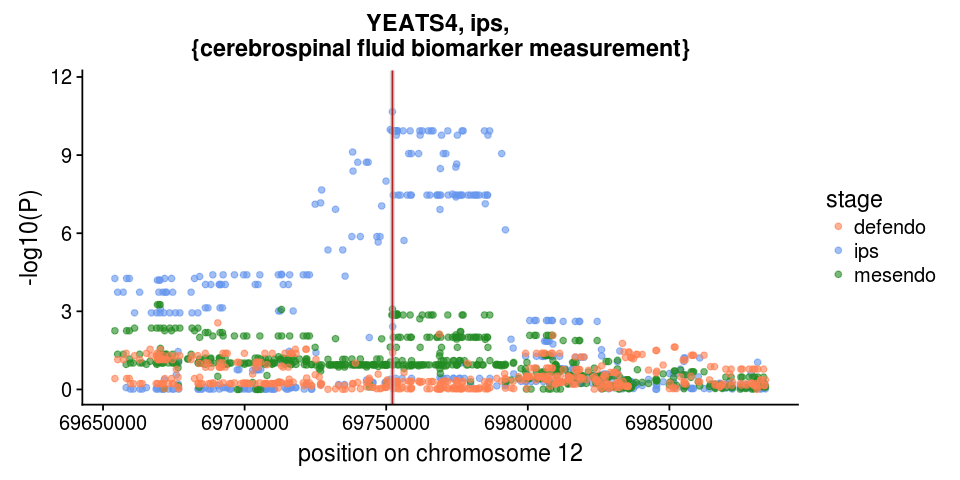

In [49]:
res = anno_allres
i = grep("YEATS4",res$feature)[1]
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

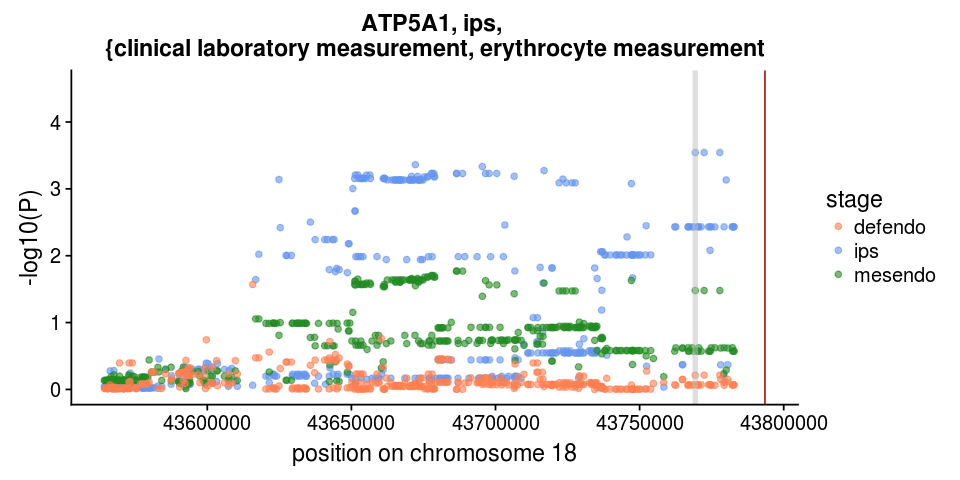

In [47]:
res = anno_allres
i = grep("ATP5A1",res$feature)[1]
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

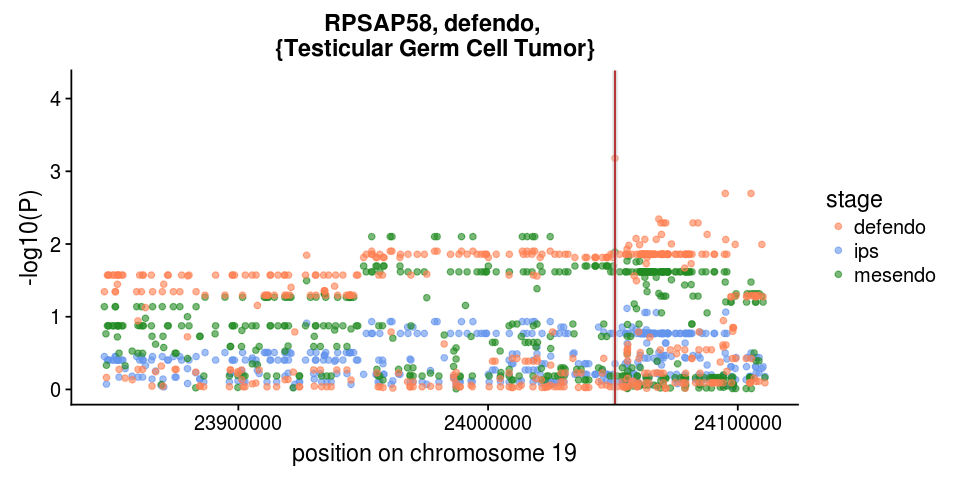

In [46]:
res = anno_allres
i = grep("RPSAP58",res$feature)[1]
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

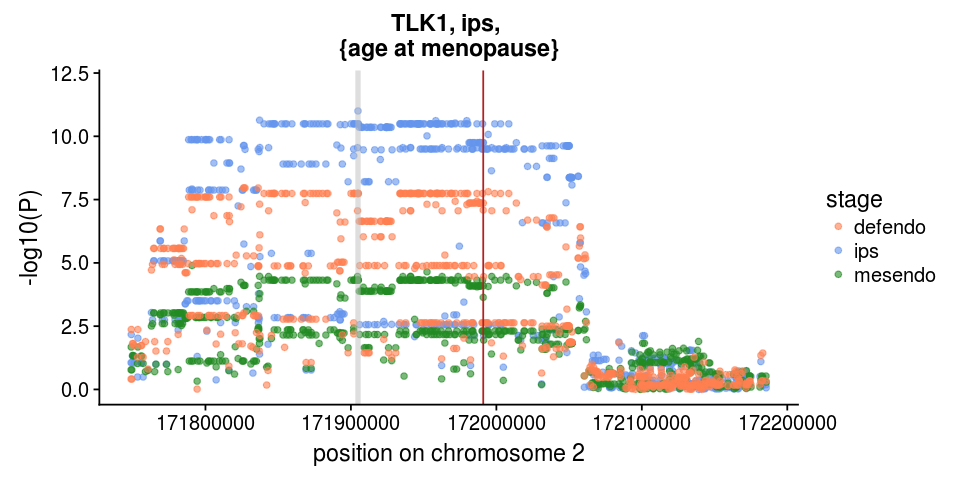

In [42]:
res = anno_allres
i = grep("TLK1",res$feature)[1]
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

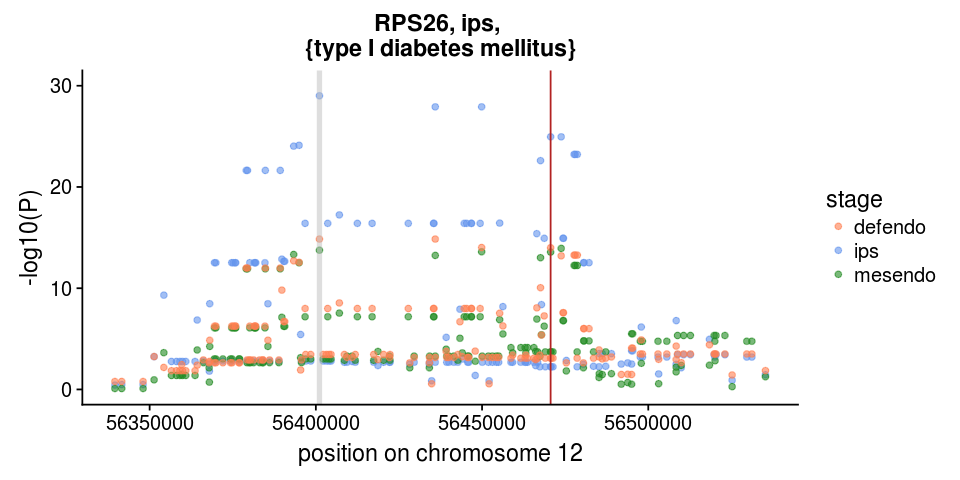

In [41]:
res = anno_allres
i = grep("RPS26",res$feature)[1]
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[5]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[10])) 
p

Warning message in data.frame(xintercept = xintercept):
“NAs introduced by coercion”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

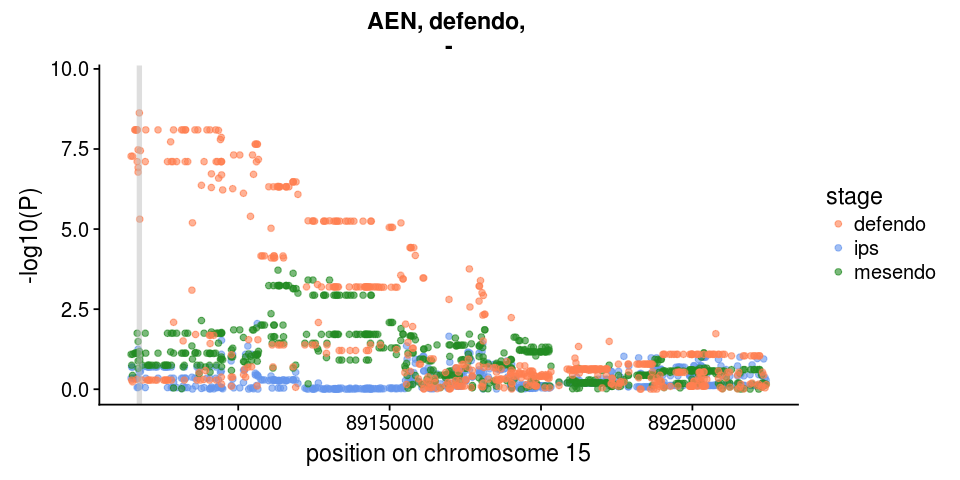

In [32]:
res = anno_allres
i = grep("AEN",res$feature)[1]
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

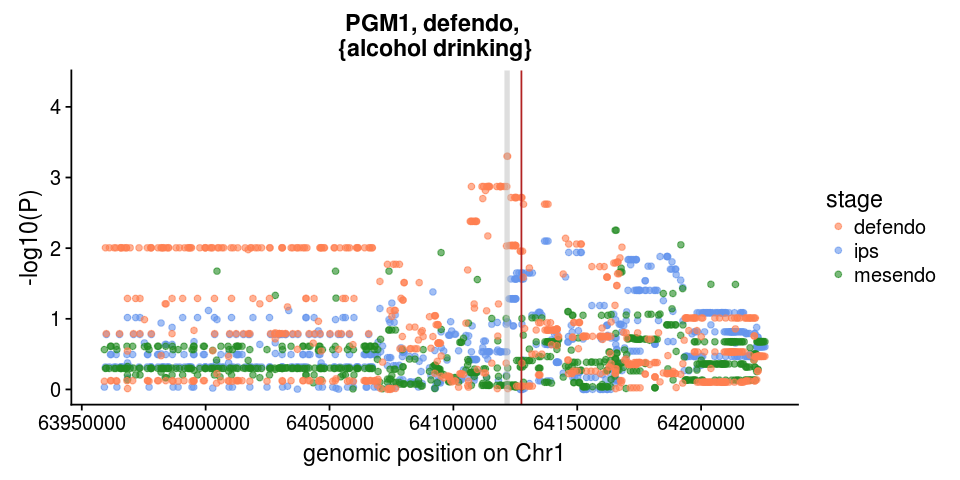

In [68]:
res = anno_allres
i = grep("PGM1",res$feature)
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
# df = df2
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
# p = p + geom_point(alpha = 0.6, col = "grey") 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage[i],
                   ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

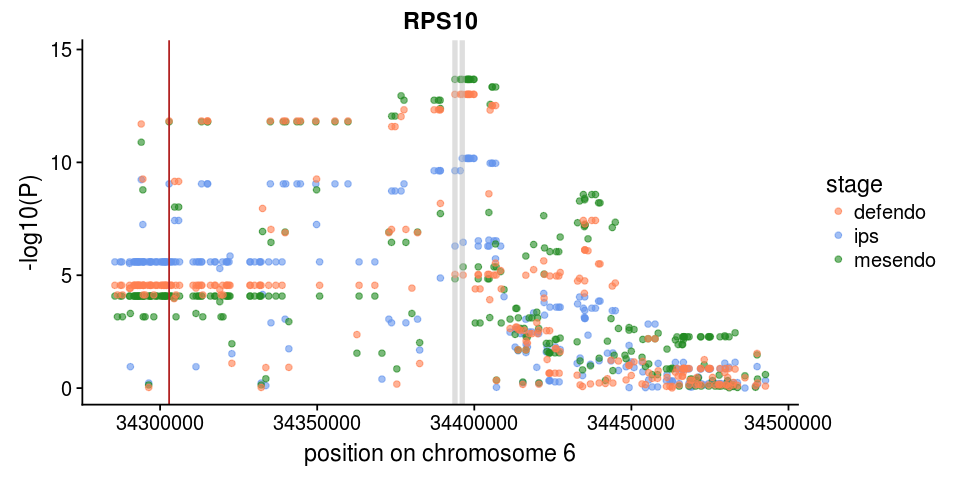

In [9]:
res = anno_allres
i = which(res$feature =="ENSG00000124614_RPS10")
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
# p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage,
#                    ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

Warning message in data.frame(xintercept = xintercept):
“NAs introduced by coercion”Warning message:
“Removed 1 rows containing missing values (geom_vline).”

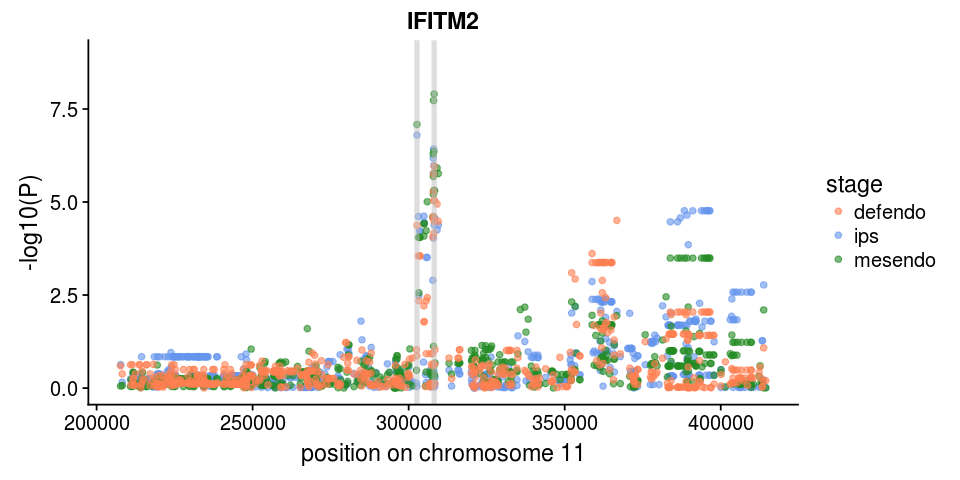

In [115]:
res = anno_allres
i = which(res$feature =="ENSG00000185201_IFITM2")
gene = res$feature[i][1]
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage)) 
p = p + geom_point(alpha = 0.6) + scale_colour_manual(values = c("coral","cornflowerblue","forestgreen")) 
p = p + xlab(paste0("position on chromosome ", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(0,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "grey", alpha = 0.5, size = 1.5)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 0.5)
p = p + ggtitle(gsub(".*_","",gene))
# p = p + ggtitle(paste0(gsub(".*_","",gene), ", ", res$stage,
#                    ", \n",unlist(strsplit(res[i,"GWAS_Annotation"],";"))[1])) 
p

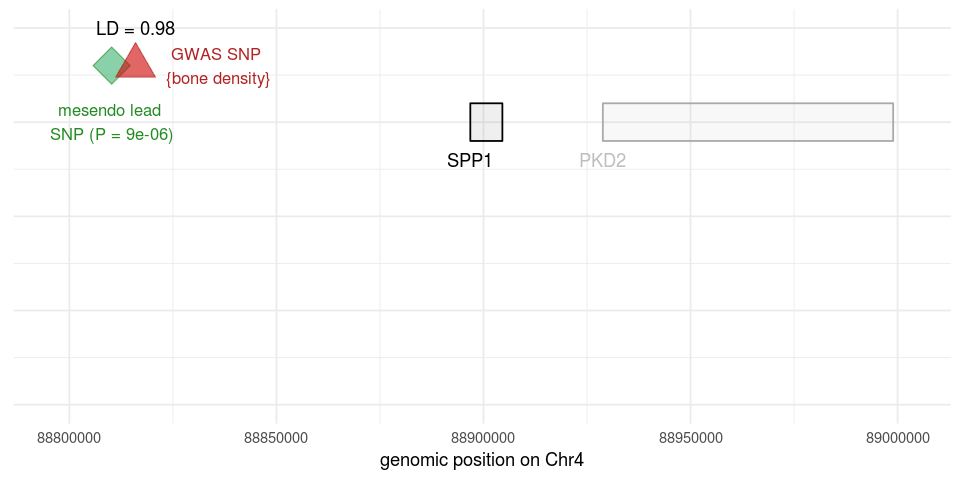

In [6]:
p = ggplot()
## add rectangles for genes
# tested gene
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = 0.7, ymax = 0.8), color = "black", alpha = 0.1, fill = "dimgrey")
p <- p + annotate("text", x = gene_start, y = 0.65, label = gene, col = "black")
# other gene in the window
p = p + geom_rect(mapping = aes(xmin = other_gene_start, xmax = other_gene_end, ymin = 0.7, ymax = 0.8), color = "darkgrey", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = other_gene_start, y = 0.65, label = other_gene, col = "grey")

## add rectangles for TFs and other regulatory elements
# LTR element
p = p + geom_rect(mapping = aes(xmin = ltr_start, xmax = ltr_end, ymin = 0.7, ymax = 0.8), color = "black", alpha = 0.1, fill = "dimgrey")
p <- p + annotate("text", x = ltr_start, y = 0.65, label = "LTR", col = "black")
# first TF
p = p + geom_rect(mapping = aes(xmin = tf1_start, xmax = tf1_end, ymin = 0.7, ymax = 0.8), color = "darkgrey", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = tf1_start, y = 0.65, label = "TRIM28", col = "grey")
# second TF
p = p + geom_rect(mapping = aes(xmin = tf2_start, xmax = tf2_end, ymin = 0.7, ymax = 0.8), color = "darkgrey", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = tf2_start, y = 0.65, label = "SETDB1", col = "grey")

# removes ugly axes
p = p + theme_minimal() 
# no legend
p = p + theme(legend.position = "none", panel.border = element_blank())
# genomic position (window tested)
p = p + xlim(xmin, xmax)
p = p + ylim(0,1)
## position of eQTL
p = p + geom_point(aes(x = res$snp_position[i], y = 0.9), col = "forestgreen", pch = 23, size = 8, fill = "mediumseagreen", alpha = 0.6)
# p = p + annotate("text", x = res$snp_position[i]-20000, y = 0.9, size = 3.5, col = "forestgreen",
#                  label = paste0("mesendo lead \nSNP (P = ",round(res$p_value.mean[i],digits = 6),")"))
p = p + annotate("text", x = res$snp_position[i], y = 0.75, size = 3.5, col = "forestgreen",
                 label = paste0("mesendo lead \nSNP (P = ",round(res$p_value.mean[i],digits = 6),")"))
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_point(aes(x = as.numeric(gwas_pos), y = 0.9), col = "firebrick", pch = 24, size = 8, fill = "red3", alpha = 0.6)
p <- p + annotate("text", x = as.numeric(gwas_pos)+20000, y = 0.9, col = "firebrick", size = 3.5,
                  label = paste0("GWAS SNP \n{bone density}"))
p <- p + annotate("text", x = as.numeric(gwas_pos), y = 1, label = paste0("LD = ",LD), col = "black")
p = p + xlab(paste0("genomic position on Chr", df$chrom[1]))
p = p + theme(axis.title.y = element_blank(), axis.text.y = element_blank(),axis.ticks.y = element_blank())
options(repr.plot.width = 8, repr.plot.height = 4)
p

In [32]:
res = gwas_nogtex_noips
i = grep("SPP1",res$feature)
res[i,]
snp_name = "rs12506273"
gwas_snp = "rs12506930"
gene_start = 88896819
gene_end = 88904562
gene = res$feature[i]
df = res.mes[res.mes$feature == gene,]
m = as.numeric(res[i,"p_value.mean"])
p = ggplot(df, aes(x = pos, y = -log10(p_value)))
p = p + geom_point(alpha = 0.5, size = 1, col = "forestgreen")  
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-1.1,-log10(m)+1)) 
p = p + geom_vline(xintercept = res$snp_position[i], col = "forestgreen", alpha = 0.4, size = 1.5)
p = p + geom_point(aes(x = res$snp_position[i], y = -log10(m)), col = "forestgreen", pch = 23, 
                   size = 3, fill = "mediumseagreen", alpha = 0.6)
options(repr.plot.width = 8, repr.plot.height = 4)
gwas_pos1 = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos1), col = "firebrick", size = 1)
p <- p + annotate("text", x = 88835000, y = 6, label = "LD = 0.98")
p <- p + annotate("text", x = 88970000, y = 5.8, label = "mesendo lead SNP", col = "forestgreen")
p <- p + annotate("text", x = 88970000, y = 4.8, label = "GWAS SNP {bone density}", col = "firebrick")
# p <- p + annotate("text", x = 88915000, y = -0.7, label = gsub(".*_","",gene), col = "black", size = 4)
# p <- p + annotate("text", x = 89010000, y = -0.7, label = "PKD2", col = "darkgrey", size = 4)
p = p + theme_classic() 
p = p + theme(legend.position = "none", panel.border = element_blank())
p1 = p

snp_id         feature              GWAS_LD             GWAS_Variant    
4113 4_88810216_G_A ENSG00000118785_SPP1 {0.983737738771296} {4_88815986_C_T}
     GWAS_Annotation global_corr_p_value stage   snp_position stage_specific
4113 {bone density}  0.04102435          mesendo 88810216     False         
     q_value p_value.mean beta.mean  p_value.int beta.int sign.int
4113 NA      9.044908e-06 -0.2924321 NA          NA

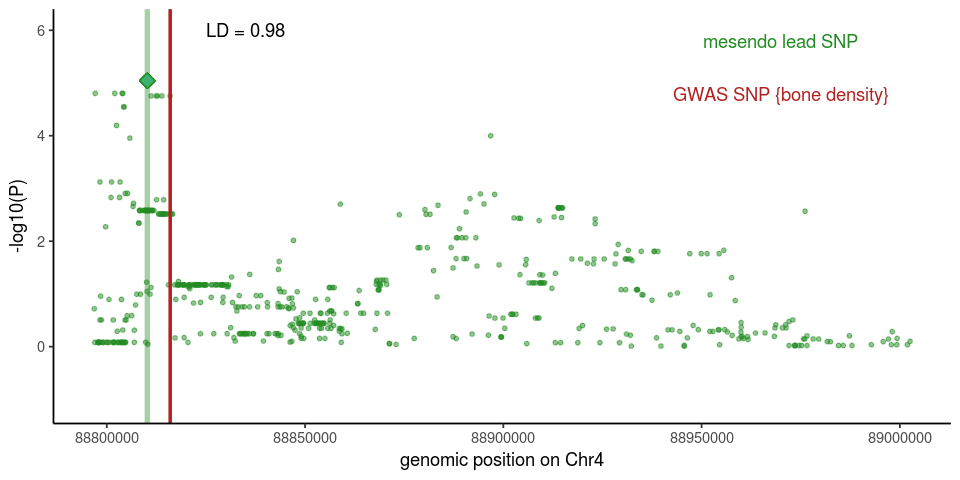

In [33]:
p1

In [34]:
res = gwas_nogtex_noips
i = grep("SPP1",res$feature)
res[i,]
snp_name = "rs12506273"
gwas_snp = "rs12506930"
gene_start = 88896819
gene_end = 88904562
gene = gsub(".*_","",res$feature[i])
LD = 0.98
other_gene = "PKD2"
other_gene_start = 88928820
other_gene_end = 88998929

df0 = res.ips[res.ips$feature == res$feature[i],]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == res$feature[i],]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == res$feature[i],]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
xmin = min(df$pos)
xmax = max(df$pos)

snp_id         feature              GWAS_LD             GWAS_Variant    
4113 4_88810216_G_A ENSG00000118785_SPP1 {0.983737738771296} {4_88815986_C_T}
     GWAS_Annotation global_corr_p_value stage   snp_position stage_specific
4113 {bone density}  0.04102435          mesendo 88810216     False         
     q_value p_value.mean beta.mean  p_value.int beta.int sign.int
4113 NA      9.044908e-06 -0.2924321 NA          NA

In [35]:
p = ggplot()
## add rectangles for genes
# tested gene
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = 0.7, ymax = 0.9), color = "black", alpha = 0.1, fill = "dimgrey")
p <- p + annotate("text", x = gene_start - 10000, y = 0.8, label = gene, col = "black")
# other gene in the window
p = p + geom_rect(mapping = aes(xmin = other_gene_start, xmax = other_gene_end, ymin = 0.7, ymax = 0.9), color = "darkgrey", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = other_gene_start - 10000, y = 0.8, label = other_gene, col = "grey")
ltr_start = 88810035
ltr_end = 88811080
tf_start = 88809988
tf_end = 88810848
## add rectangles for TFs and other regulatory elements
# LTR element
p = p + geom_rect(mapping = aes(xmin = ltr_start, xmax = ltr_end, ymin = 0.6, ymax = 0.7), color = "black", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = ltr_end + 20000, y = 0.65, label = "MER11B", col = "black")
# TF
p = p + geom_rect(mapping = aes(xmin = tf_start, xmax = tf_end, ymin = 0.4, ymax = 0.5), color = "black", alpha = 0.1, fill = "grey")
p <- p + annotate("text", x = tf_end + 20000, y = 0.45, label = "TRIM28", col = "black")


# removes ugly axes
p = p + theme_classic() 
# no legend
p = p + theme(legend.position = "none", panel.border = element_blank())
# genomic position (window tested)
p = p + xlim(xmin, xmax)
p = p + ylim(0,1)
## position of eQTL
p = p + geom_vline(xintercept = res$snp_position[i], col = "forestgreen", size = 1.5, alpha = 0.4)
gwas_pos = gsub("_.*","",gsub(paste0("\\{",df$chrom[1],"_"),"",unlist(strsplit(res[i,"GWAS_Variant"],";"))[1]))
p = p + geom_vline(xintercept = as.numeric(gwas_pos), col = "firebrick", size = 1)
p = p + xlab(paste0("genomic position on Chr", df$chrom[1]))
p = p + theme(axis.text.y = element_blank())
p = p + ylab("x")
p2 = p

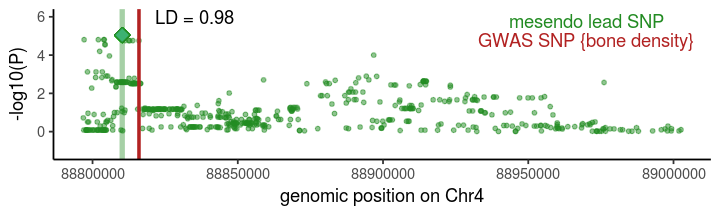

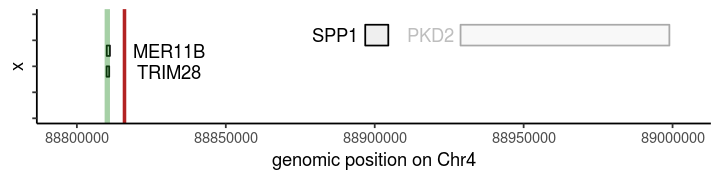

In [36]:
options(repr.plot.width = 6, repr.plot.height = 1.8)
p1
options(repr.plot.width = 6, repr.plot.height = 1.5)
p2